# import dataset and data cleaning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
data =pd.read_csv("pubg-finish-placement-prediction/train_V2.csv")


In [2]:
pd.set_option("display.max_columns",200)
data.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [3]:
# NULL Value detection
null_columns=pd.DataFrame({'Columns':data.isna().sum().index,'No. Null values':data.isna().sum().values,'Percentage':data.isna().sum().values/data.shape[0]})
null_columns

,Columns,No. Null values,Percentage
0,Id,0,0.000000e+00
1,groupId,0,0.000000e+00
2,matchId,0,0.000000e+00
3,assists,0,0.000000e+00
4,boosts,0,0.000000e+00
5,damageDealt,0,0.000000e+00
6,DBNOs,0,0.000000e+00
7,headshotKills,0,0.000000e+00
8,heals,0,0.000000e+00
9,killPlace,0,0.000000e+00


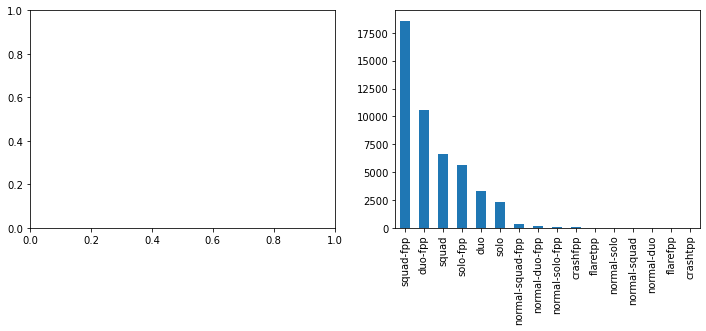

In [4]:
# Visualisation of different MatchTypes
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
data.groupby('matchId')['matchType'].first().value_counts().plot.bar()

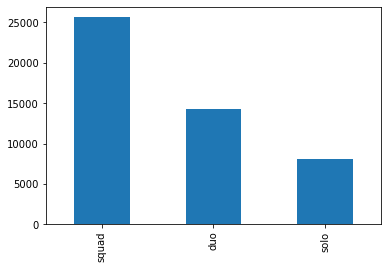

In [5]:
#Mapping to only three Match types and visualization
new_train_data=data
def mapthematch(data1):
  mapping = lambda y: 'solo' if ('solo' in y) else 'duo' if('duo' in y) or ('crash' in y) else 'squad'
  data1['matchType'] = data['matchType'].apply(mapping)
  return(new_train_data)
data1=mapthematch(new_train_data)
data1.groupby('matchId')['matchType'].first().value_counts().plot.bar()

In [ ]:
# Data cleaning
data1.drop(2744604,inplace = True)

# feature Engineering

In [7]:
Total_Distance = data1['rideDistance'] +  data1['walkDistance']
data1['TotalDistance'] = Total_Distance


In [8]:
data1['afk'] = ((Total_Distance == 0) & (data1['kills']==0))
data1['afk']. value_counts()

False    4349077
True       97888
Name: afk, dtype: int64

In [9]:
data1.drop(data1[data1['afk'] == True].index , inplace = True )

In [10]:
data1['afk'] = ((Total_Distance == 0) & (data1['kills']==0))
data1['afk']. value_counts()

False    4349077
Name: afk, dtype: int64

In [11]:
data1.drop(['afk'], axis =1,inplace = True)

In [12]:
data1['players_joined'] = data1.groupby('matchId')['matchId'].transform('count')


In [13]:
data1['players_in_a_team'] = data1.groupby('groupId').groupId.transform('count')


In [14]:
team_mapper = lambda x: 1 if ('solo' in x) else 2 if ('duo' in x) else 4
data1["max_team"] = data1['matchType'].apply(team_mapper)
data1['a'] = data1["players_in_a_team"] > data1["max_team"]
data1['a'] .value_counts()

False    3543752
True      805325
Name: a, dtype: int64

In [15]:
data1.drop(data1[data1['a'] == True].index , inplace = True )

In [16]:
data1['a'].value_counts()

False    3543752
Name: a, dtype: int64

In [17]:
data1.drop(['a'], axis =1,inplace = True)

In [18]:
ratio = data1['headshotKills']/ data1['kills']
data1['headshot/kill'] = ratio
data1['headshot/kill']

0          NaN
1          NaN
2          NaN
3          NaN
4          0.0
          ... 
4446959    NaN
4446962    NaN
4446963    NaN
4446964    0.5
4446965    0.0
Name: headshot/kill, Length: 3543752, dtype: float64

In [19]:
AR= data1['assists'] + data1['revives']
data1['Assist_Revive'] = AR
data1['Assist_Revive']

0          0
1          0
2          1
3          0
4          0
          ..
4446959    0
4446962    0
4446963    0
4446964    2
4446965    0
Name: Assist_Revive, Length: 3543752, dtype: int64

In [20]:
KWalkDist = data1['kills'] / (data1['walkDistance']+1)
data1['KillsPerDist'] = KWalkDist
data1['KillsPerDist']

0          0.000000
1          0.000000
2          0.000000
3          0.000000
4          0.019704
             ...   
4446959    0.000000
4446962    0.000000
4446963    0.000000
4446964    0.000728
4446965    0.001606
Name: KillsPerDist, Length: 3543752, dtype: float64

In [21]:
hb = data1['heals'] + data1['boosts']
data1['Heals_Boosts'] = hb
data1['Heals_Boosts']

0          0
1          0
2          0
3          0
4          0
          ..
4446959    0
4446962    1
4446963    0
4446964    6
4446965    3
Name: Heals_Boosts, Length: 3543752, dtype: int64

In [22]:
HWalkDist = data1['Heals_Boosts'] / (data1['walkDistance']+1)
data1['HealsPerDist'] = HWalkDist
data1['HealsPerDist']

0          0.000000
1          0.000000
2          0.000000
3          0.000000
4          0.000000
             ...   
4446959    0.000000
4446962    0.012092
4446963    0.000000
4446964    0.002183
4446965    0.002410
Name: HealsPerDist, Length: 3543752, dtype: float64

In [23]:
killmax = data1['killPlace']/(data1['maxPlace']+1)
data1['killP/maxP'] = killmax


In [24]:
#total damage by a team
data1['total_team_damage'] = data1.groupby('groupId').damageDealt.transform('sum')
#total kills by a team
data1['total_kills_by_team'] =  data1.groupby('groupId').kills.transform('sum')

In [25]:
data1.drop(data1.index[100000:], inplace=True)

In [26]:
data1

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,TotalDistance,players_joined,players_in_a_team,max_team,headshot/kill,Assist_Revive,KillsPerDist,Heals_Boosts,HealsPerDist,killP/maxP,total_team_damage,total_kills_by_team
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.000,1306,squad,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,244.8000,94,4,4,NaN,0,0.000000,0,0.000000,2.068966,408.75,4
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.000,1777,squad,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,1434.0045,90,4,4,NaN,0,0.000000,0,0.000000,2.111111,571.27,4
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.000,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755,161.8000,93,2,2,NaN,1,0.000000,0,0.000000,0.921569,214.60,2
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.000,1436,squad,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667,202.7000,91,1,4,NaN,0,0.000000,0,0.000000,2.343750,32.90,0
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.530,1424,solo,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875,49.7500,94,1,1,0.0,0,0.019704,0,0.000000,0.459184,100.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125533,ef2b7ab0b6d650,30d55470d04d8c,f6a2a1b9681cfd,0,0,0.00,0,0,0,72,0,0,0,0.000,1329,duo,46,45,1499,0,0.0000,0,0.00,0,0,288.00,4,0,0.2222,288.0000,89,2,2,NaN,0,0.000000,0,0.000000,1.531915,0.00,0
125534,5fe550644ed56f,d5b2eb5a136c67,2bf2efb5926d5b,1,2,225.90,1,0,6,25,1178,1,1,16.760,1964,duo,45,45,-1,0,3980.0000,0,0.00,0,0,4439.00,6,1501,0.9318,8419.0000,90,1,2,0.0,1,0.000225,8,0.001802,0.543478,225.90,1
125535,14dfc672b8cad0,96e8f35201a9d1,c5a08a5af89e43,0,0,175.60,1,0,0,18,0,2,1,6.899,2029,duo,46,46,1464,1,0.0000,0,0.00,0,0,248.20,3,0,0.3556,248.2000,90,2,2,0.0,1,0.008026,0,0.000000,0.382979,294.50,3
125536,e0508dda1a6fa7,29ab6a5e82b63f,99810e4f0def12,0,5,158.90,2,0,1,21,1344,1,1,17.310,1769,squad,29,24,-1,2,2761.0000,0,0.00,0,0,2685.00,3,1507,0.7143,5446.0000,86,4,4,0.0,2,0.000372,6,0.002234,0.700000,395.50,6


In [27]:
# Normalised data
data1['killsNormalised'] = data1['kills']*((100-data1['players_joined'])/100 + 1)
data1['DamageNormalised'] = data1['damageDealt']*((100-data1['players_joined'])/100 + 1)
data1['killPlaceNorm'] = data1['killPlace']*((100-data1['players_joined'])/100 + 1)
data1['killStreakNorm'] = data1['killStreaks']*((100-data1['players_joined'])/100 + 1)

data1['killperdistNorm'] = data1['KillsPerDist']*((100-data1['players_joined'])/100 + 1)

data1['killP/maxP_Norm'] = data1['killP/maxP']*((100-data1['players_joined'])/100 + 1)

data1['totalTeamDamageNorm'] = data1['total_team_damage']*((100-data1['players_joined'])/100 + 1)

data1['TotalKillsByTeamNorm'] = data1['total_kills_by_team']*((100-data1['players_joined'])/100 + 1)


In [28]:
data2 = data1[['DBNOs','killPlaceNorm','killStreakNorm','longestKill','TotalDistance','killperdistNorm','HealsPerDist','Assist_Revive','killP/maxP_Norm','headshot/kill','totalTeamDamageNorm','TotalKillsByTeamNorm','killsNormalised','DamageNormalised','Heals_Boosts','winPlacePerc']]

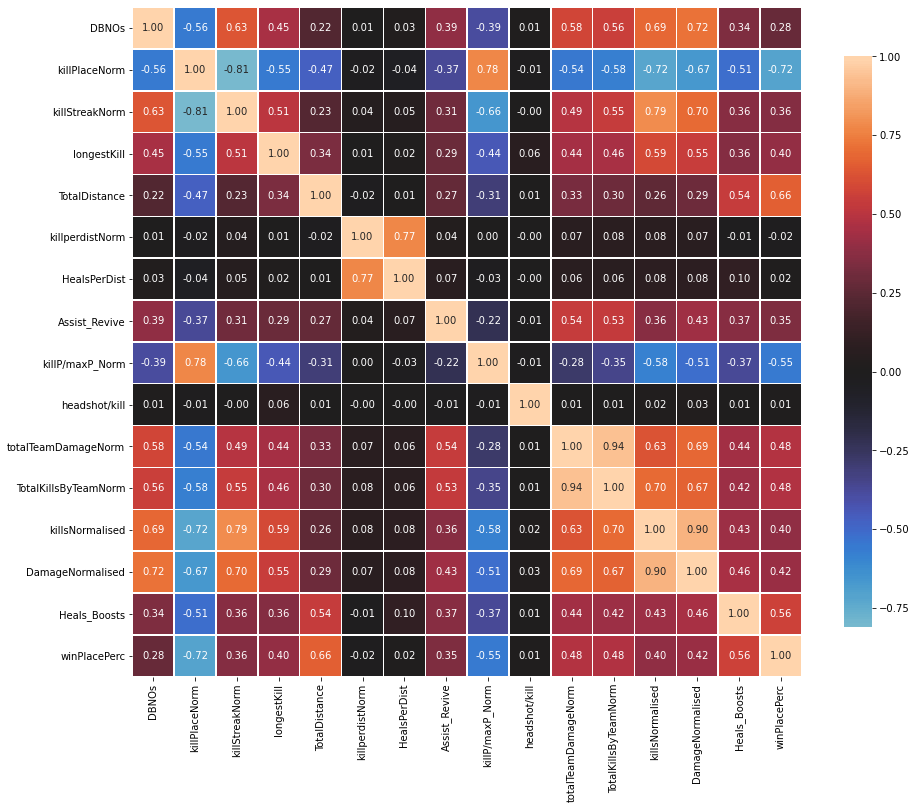

In [29]:
#corelation heatmap
def correlation_heatmap(data2):
    correlations = data2.corr()

    fig, ax = plt.subplots(figsize=(15,15))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.show();
    
correlation_heatmap(data2)

# 14 Features

In [30]:
cdf = data1[['DBNOs','killPlaceNorm','killStreakNorm','longestKill','TotalDistance','killperdistNorm','HealsPerDist','Assist_Revive','killP/maxP_Norm','totalTeamDamageNorm','TotalKillsByTeamNorm','killsNormalised','DamageNormalised','winPlacePerc']]

In [31]:
# feature selection
X= data1[['DBNOs','killPlaceNorm','killStreakNorm','longestKill','TotalDistance','killperdistNorm','HealsPerDist','Assist_Revive','killP/maxP_Norm','totalTeamDamageNorm','TotalKillsByTeamNorm','killsNormalised','DamageNormalised']]
Y= data1[['winPlacePerc']]

In [32]:
#splitting
from sklearn.model_selection import train_test_split
x_train1,  x_valid, y_train1, y_valid = train_test_split(X,Y,test_size=0.15, random_state=27)


In [33]:
#MAE CALCULATION FUNCTION
from sklearn.metrics import mean_absolute_error, r2_score
def calculate_error(cl,name):
  print(name)
  print('Mean Absolute Error is {:.5f}'.format(mean_absolute_error(y_valid, cl.predict(x_valid))))
  print('R2 score is {:.2%}'.format(r2_score(y_valid, cl.predict(x_valid))))


# LGBM RANDOM FOREST GBR

In [34]:
#LGBM
import lightgbm as lgb
# store starting time 
begin = time.time() 
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.1, n_estimators=2000,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

model_lgb.fit(x_train1, y_train1, eval_set=[(x_train1, y_train1), (x_valid, y_valid)],
                eval_metric= 'mae', verbose=1, early_stopping_rounds=50)
time.sleep(1) 
# store end time 
end = time.time() 
  
# total time taken 
print(f"Total runtime of the program is {end - begin}") 


[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[1]	training's l1: 0.252471	training's l2: 0.0841817	valid_1's l1: 0.250066	valid_1's l2: 0.082945
Training until validation scores don't improve for 50 rounds
[2]	training's l1: 0.23833	training's l2: 0.0749188	valid_1's l1: 0.236142	valid_1's l2: 0.0739019
[3]	training's l1: 0.222485	training's l2: 0.0661553	valid_1's l1: 0.220652	valid_1's l2: 0.0653765
[4]	training's l1: 0.215569	

[95]	training's l1: 0.0751889	training's l2: 0.0101204	valid_1's l1: 0.0760253	valid_1's l2: 0.0104243
[96]	training's l1: 0.0751724	training's l2: 0.0101077	valid_1's l1: 0.0760215	valid_1's l2: 0.010415
[97]	training's l1: 0.0751681	training's l2: 0.0101011	valid_1's l1: 0.0760087	valid_1's l2: 0.0104059
[98]	training's l1: 0.0751369	training's l2: 0.0100917	valid_1's l1: 0.0759746	valid_1's l2: 0.0103959
[99]	training's l1: 0.0749279	training's l2: 0.0100635	valid_1's l1: 0.0757663	valid_1's l2: 0.0103689
[100]	training's l1: 0.0749366	training's l2: 0.0100547	valid_1's l1: 0.0757744	valid_1's l2: 0.0103603
[101]	training's l1: 0.0746432	training's l2: 0.010011	valid_1's l1: 0.0755131	valid_1's l2: 0.0103207
[102]	training's l1: 0.0745144	training's l2: 0.00997651	valid_1's l1: 0.0753963	valid_1's l2: 0.0102877
[103]	training's l1: 0.0743364	training's l2: 0.00995254	valid_1's l1: 0.0752274	valid_1's l2: 0.0102654
[104]	training's l1: 0.0741574	training's l2: 0.00990455	valid_1's l1

[198]	training's l1: 0.0690891	training's l2: 0.00872752	valid_1's l1: 0.0700753	valid_1's l2: 0.00905112
[199]	training's l1: 0.0690576	training's l2: 0.00872226	valid_1's l1: 0.0700484	valid_1's l2: 0.00904944
[200]	training's l1: 0.069032	training's l2: 0.00871829	valid_1's l1: 0.0700253	valid_1's l2: 0.00904719
[201]	training's l1: 0.0690214	training's l2: 0.00871524	valid_1's l1: 0.0700144	valid_1's l2: 0.00904339
[202]	training's l1: 0.0689936	training's l2: 0.00870852	valid_1's l1: 0.0699859	valid_1's l2: 0.00903588
[203]	training's l1: 0.0689328	training's l2: 0.00869542	valid_1's l1: 0.0699253	valid_1's l2: 0.00902245
[204]	training's l1: 0.0689373	training's l2: 0.00869211	valid_1's l1: 0.0699285	valid_1's l2: 0.0090192
[205]	training's l1: 0.0689201	training's l2: 0.00868829	valid_1's l1: 0.0699145	valid_1's l2: 0.0090163
[206]	training's l1: 0.0689192	training's l2: 0.00868638	valid_1's l1: 0.0699156	valid_1's l2: 0.00901561
[207]	training's l1: 0.0688623	training's l2: 0.0

[300]	training's l1: 0.0664077	training's l2: 0.00811358	valid_1's l1: 0.0674317	valid_1's l2: 0.00845403
[301]	training's l1: 0.0664128	training's l2: 0.00811015	valid_1's l1: 0.0674347	valid_1's l2: 0.00845017
[302]	training's l1: 0.0663945	training's l2: 0.00810128	valid_1's l1: 0.0674088	valid_1's l2: 0.00843976
[303]	training's l1: 0.0663963	training's l2: 0.00809492	valid_1's l1: 0.0674127	valid_1's l2: 0.00843335
[304]	training's l1: 0.0663845	training's l2: 0.00809348	valid_1's l1: 0.0674023	valid_1's l2: 0.00843208
[305]	training's l1: 0.0663762	training's l2: 0.0080924	valid_1's l1: 0.067397	valid_1's l2: 0.00843151
[306]	training's l1: 0.0663345	training's l2: 0.00808653	valid_1's l1: 0.0673579	valid_1's l2: 0.00842563
[307]	training's l1: 0.0663018	training's l2: 0.00808147	valid_1's l1: 0.0673342	valid_1's l2: 0.00842277
[308]	training's l1: 0.0663045	training's l2: 0.00807843	valid_1's l1: 0.0673391	valid_1's l2: 0.00841935
[309]	training's l1: 0.066296	training's l2: 0.0

[404]	training's l1: 0.0649904	training's l2: 0.00776771	valid_1's l1: 0.0660823	valid_1's l2: 0.00811601
[405]	training's l1: 0.0649844	training's l2: 0.00776713	valid_1's l1: 0.0660836	valid_1's l2: 0.00811668
[406]	training's l1: 0.0649743	training's l2: 0.0077641	valid_1's l1: 0.066072	valid_1's l2: 0.00811442
[407]	training's l1: 0.0649679	training's l2: 0.00776285	valid_1's l1: 0.0660666	valid_1's l2: 0.00811344
[408]	training's l1: 0.0649268	training's l2: 0.00775888	valid_1's l1: 0.0660259	valid_1's l2: 0.00810919
[409]	training's l1: 0.0649091	training's l2: 0.00775606	valid_1's l1: 0.0660106	valid_1's l2: 0.0081056
[410]	training's l1: 0.0648982	training's l2: 0.00775352	valid_1's l1: 0.0660005	valid_1's l2: 0.00810414
[411]	training's l1: 0.0648984	training's l2: 0.00775195	valid_1's l1: 0.0660041	valid_1's l2: 0.00810309
[412]	training's l1: 0.0648996	training's l2: 0.00775151	valid_1's l1: 0.0660099	valid_1's l2: 0.00810339
[413]	training's l1: 0.0648763	training's l2: 0.0

[514]	training's l1: 0.0637814	training's l2: 0.00751916	valid_1's l1: 0.0649808	valid_1's l2: 0.00790068
[515]	training's l1: 0.0637782	training's l2: 0.00751812	valid_1's l1: 0.0649817	valid_1's l2: 0.00790042
[516]	training's l1: 0.0637758	training's l2: 0.00751697	valid_1's l1: 0.064981	valid_1's l2: 0.00789904
[517]	training's l1: 0.0637712	training's l2: 0.00751623	valid_1's l1: 0.0649784	valid_1's l2: 0.00789871
[518]	training's l1: 0.0637655	training's l2: 0.00751503	valid_1's l1: 0.0649776	valid_1's l2: 0.0078988
[519]	training's l1: 0.063752	training's l2: 0.00751368	valid_1's l1: 0.0649661	valid_1's l2: 0.00789751
[520]	training's l1: 0.0637553	training's l2: 0.00751121	valid_1's l1: 0.0649695	valid_1's l2: 0.00789617
[521]	training's l1: 0.0637089	training's l2: 0.00750348	valid_1's l1: 0.0649277	valid_1's l2: 0.00788814
[522]	training's l1: 0.0637074	training's l2: 0.00749954	valid_1's l1: 0.0649255	valid_1's l2: 0.00788506
[523]	training's l1: 0.0636896	training's l2: 0.0

[619]	training's l1: 0.0630055	training's l2: 0.00734059	valid_1's l1: 0.0642945	valid_1's l2: 0.00773754
[620]	training's l1: 0.0630075	training's l2: 0.0073397	valid_1's l1: 0.0643006	valid_1's l2: 0.00773823
[621]	training's l1: 0.0629984	training's l2: 0.00733864	valid_1's l1: 0.06429	valid_1's l2: 0.0077368
[622]	training's l1: 0.062985	training's l2: 0.00733647	valid_1's l1: 0.0642732	valid_1's l2: 0.00773407
[623]	training's l1: 0.0629698	training's l2: 0.00733455	valid_1's l1: 0.0642626	valid_1's l2: 0.00773367
[624]	training's l1: 0.0629737	training's l2: 0.00733381	valid_1's l1: 0.0642654	valid_1's l2: 0.00773269
[625]	training's l1: 0.062967	training's l2: 0.00733236	valid_1's l1: 0.0642568	valid_1's l2: 0.00773066
[626]	training's l1: 0.0629589	training's l2: 0.00732888	valid_1's l1: 0.0642449	valid_1's l2: 0.00772563
[627]	training's l1: 0.0629518	training's l2: 0.00732717	valid_1's l1: 0.064242	valid_1's l2: 0.00772667
[628]	training's l1: 0.0629291	training's l2: 0.00732

[723]	training's l1: 0.0624987	training's l2: 0.00722831	valid_1's l1: 0.0638236	valid_1's l2: 0.0076425
[724]	training's l1: 0.0624988	training's l2: 0.00722755	valid_1's l1: 0.0638233	valid_1's l2: 0.00764175
[725]	training's l1: 0.0624869	training's l2: 0.00722709	valid_1's l1: 0.0638133	valid_1's l2: 0.00764158
[726]	training's l1: 0.0624851	training's l2: 0.00722586	valid_1's l1: 0.0638109	valid_1's l2: 0.0076406
[727]	training's l1: 0.062475	training's l2: 0.00722508	valid_1's l1: 0.0638007	valid_1's l2: 0.00764005
[728]	training's l1: 0.0624753	training's l2: 0.00722445	valid_1's l1: 0.0637984	valid_1's l2: 0.00763973
[729]	training's l1: 0.062471	training's l2: 0.00722314	valid_1's l1: 0.0637921	valid_1's l2: 0.00763765
[730]	training's l1: 0.0624525	training's l2: 0.00722151	valid_1's l1: 0.0637744	valid_1's l2: 0.00763615
[731]	training's l1: 0.0624505	training's l2: 0.00722084	valid_1's l1: 0.0637741	valid_1's l2: 0.00763646
[732]	training's l1: 0.0624504	training's l2: 0.00

[830]	training's l1: 0.0620547	training's l2: 0.00712647	valid_1's l1: 0.0634409	valid_1's l2: 0.00755493
[831]	training's l1: 0.0620541	training's l2: 0.00712623	valid_1's l1: 0.0634416	valid_1's l2: 0.00755487
[832]	training's l1: 0.0620523	training's l2: 0.0071253	valid_1's l1: 0.0634413	valid_1's l2: 0.00755409
[833]	training's l1: 0.0620508	training's l2: 0.00712465	valid_1's l1: 0.0634397	valid_1's l2: 0.0075533
[834]	training's l1: 0.06205	training's l2: 0.00712389	valid_1's l1: 0.0634401	valid_1's l2: 0.00755302
[835]	training's l1: 0.062046	training's l2: 0.00712244	valid_1's l1: 0.063433	valid_1's l2: 0.00755004
[836]	training's l1: 0.0620466	training's l2: 0.00712153	valid_1's l1: 0.0634323	valid_1's l2: 0.00754924
[837]	training's l1: 0.0620306	training's l2: 0.0071184	valid_1's l1: 0.0634193	valid_1's l2: 0.00754686
[838]	training's l1: 0.062031	training's l2: 0.00711771	valid_1's l1: 0.0634214	valid_1's l2: 0.0075471
[839]	training's l1: 0.0620067	training's l2: 0.0071104

[941]	training's l1: 0.061723	training's l2: 0.00704704	valid_1's l1: 0.0631916	valid_1's l2: 0.00749535
[942]	training's l1: 0.0617205	training's l2: 0.00704646	valid_1's l1: 0.0631899	valid_1's l2: 0.00749527
[943]	training's l1: 0.0617192	training's l2: 0.00704632	valid_1's l1: 0.0631897	valid_1's l2: 0.00749527
[944]	training's l1: 0.0617174	training's l2: 0.00704608	valid_1's l1: 0.0631892	valid_1's l2: 0.00749538
[945]	training's l1: 0.0617093	training's l2: 0.00704559	valid_1's l1: 0.0631818	valid_1's l2: 0.00749495
[946]	training's l1: 0.06171	training's l2: 0.00704518	valid_1's l1: 0.063182	valid_1's l2: 0.00749485
[947]	training's l1: 0.0616952	training's l2: 0.00704353	valid_1's l1: 0.0631645	valid_1's l2: 0.00749245
[948]	training's l1: 0.0616938	training's l2: 0.007043	valid_1's l1: 0.0631637	valid_1's l2: 0.00749193
[949]	training's l1: 0.0616919	training's l2: 0.00704226	valid_1's l1: 0.0631618	valid_1's l2: 0.0074908
[950]	training's l1: 0.0616927	training's l2: 0.00704

[1046]	training's l1: 0.0614195	training's l2: 0.00698556	valid_1's l1: 0.0629472	valid_1's l2: 0.00745265
[1047]	training's l1: 0.0614185	training's l2: 0.00698542	valid_1's l1: 0.0629464	valid_1's l2: 0.00745253
[1048]	training's l1: 0.0614186	training's l2: 0.0069848	valid_1's l1: 0.0629463	valid_1's l2: 0.00745175
[1049]	training's l1: 0.0614145	training's l2: 0.00698452	valid_1's l1: 0.0629429	valid_1's l2: 0.0074515
[1050]	training's l1: 0.0614151	training's l2: 0.00698414	valid_1's l1: 0.0629421	valid_1's l2: 0.00745126
[1051]	training's l1: 0.0614128	training's l2: 0.0069838	valid_1's l1: 0.062939	valid_1's l2: 0.00745082
[1052]	training's l1: 0.0614111	training's l2: 0.00698346	valid_1's l1: 0.062939	valid_1's l2: 0.00745113
[1053]	training's l1: 0.0614083	training's l2: 0.00698285	valid_1's l1: 0.0629365	valid_1's l2: 0.00745041
[1054]	training's l1: 0.0614078	training's l2: 0.00698268	valid_1's l1: 0.0629363	valid_1's l2: 0.0074504
[1055]	training's l1: 0.0614002	training's 

[1123]	training's l1: 0.0612608	training's l2: 0.00695081	valid_1's l1: 0.0628463	valid_1's l2: 0.00743081
[1124]	training's l1: 0.0612601	training's l2: 0.00695016	valid_1's l1: 0.0628459	valid_1's l2: 0.00743008
[1125]	training's l1: 0.0612534	training's l2: 0.00694947	valid_1's l1: 0.0628359	valid_1's l2: 0.00742906
[1126]	training's l1: 0.0612533	training's l2: 0.00694933	valid_1's l1: 0.0628366	valid_1's l2: 0.00742904
[1127]	training's l1: 0.0612521	training's l2: 0.00694885	valid_1's l1: 0.0628366	valid_1's l2: 0.00742906
[1128]	training's l1: 0.0612513	training's l2: 0.00694867	valid_1's l1: 0.0628369	valid_1's l2: 0.00742917
[1129]	training's l1: 0.0612505	training's l2: 0.00694845	valid_1's l1: 0.062834	valid_1's l2: 0.00742858
[1130]	training's l1: 0.0612535	training's l2: 0.00694818	valid_1's l1: 0.0628371	valid_1's l2: 0.00742866
[1131]	training's l1: 0.0612525	training's l2: 0.0069479	valid_1's l1: 0.0628367	valid_1's l2: 0.00742844
[1132]	training's l1: 0.0612487	trainin

[1205]	training's l1: 0.0610945	training's l2: 0.00690927	valid_1's l1: 0.0627268	valid_1's l2: 0.00740433
[1206]	training's l1: 0.0610939	training's l2: 0.00690846	valid_1's l1: 0.0627264	valid_1's l2: 0.00740365
[1207]	training's l1: 0.0610883	training's l2: 0.00690785	valid_1's l1: 0.0627224	valid_1's l2: 0.00740284
[1208]	training's l1: 0.0610882	training's l2: 0.00690769	valid_1's l1: 0.0627207	valid_1's l2: 0.00740251
[1209]	training's l1: 0.0610848	training's l2: 0.00690731	valid_1's l1: 0.0627186	valid_1's l2: 0.00740222
[1210]	training's l1: 0.0610845	training's l2: 0.00690663	valid_1's l1: 0.0627179	valid_1's l2: 0.00740123
[1211]	training's l1: 0.0610829	training's l2: 0.00690643	valid_1's l1: 0.0627158	valid_1's l2: 0.00740076
[1212]	training's l1: 0.0610827	training's l2: 0.00690629	valid_1's l1: 0.0627158	valid_1's l2: 0.00740071
[1213]	training's l1: 0.061079	training's l2: 0.00690522	valid_1's l1: 0.0627109	valid_1's l2: 0.00739956
[1214]	training's l1: 0.061079	trainin

[1321]	training's l1: 0.0608977	training's l2: 0.00685681	valid_1's l1: 0.062626	valid_1's l2: 0.00737863
[1322]	training's l1: 0.060897	training's l2: 0.00685662	valid_1's l1: 0.0626252	valid_1's l2: 0.00737853
[1323]	training's l1: 0.0608909	training's l2: 0.0068556	valid_1's l1: 0.062622	valid_1's l2: 0.00737886
[1324]	training's l1: 0.0608883	training's l2: 0.00685535	valid_1's l1: 0.0626199	valid_1's l2: 0.00737884
[1325]	training's l1: 0.0608863	training's l2: 0.00685513	valid_1's l1: 0.0626178	valid_1's l2: 0.00737854
[1326]	training's l1: 0.0608809	training's l2: 0.00685471	valid_1's l1: 0.0626112	valid_1's l2: 0.00737818
[1327]	training's l1: 0.0608761	training's l2: 0.0068543	valid_1's l1: 0.0626066	valid_1's l2: 0.00737784
[1328]	training's l1: 0.0608766	training's l2: 0.00685399	valid_1's l1: 0.0626095	valid_1's l2: 0.00737803
[1329]	training's l1: 0.0608748	training's l2: 0.00685374	valid_1's l1: 0.0626062	valid_1's l2: 0.00737749
[1330]	training's l1: 0.060874	training's 

[1401]	training's l1: 0.0607854	training's l2: 0.0068301	valid_1's l1: 0.062558	valid_1's l2: 0.00736414
[1402]	training's l1: 0.0607808	training's l2: 0.0068296	valid_1's l1: 0.0625521	valid_1's l2: 0.00736376
[1403]	training's l1: 0.0607729	training's l2: 0.00682882	valid_1's l1: 0.0625453	valid_1's l2: 0.00736348
[1404]	training's l1: 0.0607725	training's l2: 0.00682855	valid_1's l1: 0.0625442	valid_1's l2: 0.00736359
[1405]	training's l1: 0.0607689	training's l2: 0.00682804	valid_1's l1: 0.0625388	valid_1's l2: 0.00736295
[1406]	training's l1: 0.0607666	training's l2: 0.00682776	valid_1's l1: 0.0625383	valid_1's l2: 0.00736326
[1407]	training's l1: 0.0607642	training's l2: 0.00682745	valid_1's l1: 0.0625363	valid_1's l2: 0.00736319
[1408]	training's l1: 0.0607603	training's l2: 0.00682705	valid_1's l1: 0.0625341	valid_1's l2: 0.00736296
[1409]	training's l1: 0.0607549	training's l2: 0.00682667	valid_1's l1: 0.0625277	valid_1's l2: 0.0073624
[1410]	training's l1: 0.0607557	training'

[1511]	training's l1: 0.0606061	training's l2: 0.00679084	valid_1's l1: 0.062446	valid_1's l2: 0.00734622
[1512]	training's l1: 0.0606055	training's l2: 0.00679061	valid_1's l1: 0.0624476	valid_1's l2: 0.00734648
[1513]	training's l1: 0.060603	training's l2: 0.00679034	valid_1's l1: 0.0624455	valid_1's l2: 0.00734638
[1514]	training's l1: 0.0606033	training's l2: 0.00679012	valid_1's l1: 0.0624452	valid_1's l2: 0.00734618
[1515]	training's l1: 0.0606031	training's l2: 0.00678998	valid_1's l1: 0.0624448	valid_1's l2: 0.00734564
[1516]	training's l1: 0.0606036	training's l2: 0.00678959	valid_1's l1: 0.0624455	valid_1's l2: 0.00734525
[1517]	training's l1: 0.0606028	training's l2: 0.0067893	valid_1's l1: 0.0624463	valid_1's l2: 0.0073452
[1518]	training's l1: 0.0605989	training's l2: 0.00678868	valid_1's l1: 0.0624401	valid_1's l2: 0.00734348
[1519]	training's l1: 0.0605983	training's l2: 0.00678847	valid_1's l1: 0.0624393	valid_1's l2: 0.00734324
[1520]	training's l1: 0.0605966	training'

[1617]	training's l1: 0.0604852	training's l2: 0.00675862	valid_1's l1: 0.062414	valid_1's l2: 0.00733687
[1618]	training's l1: 0.0604863	training's l2: 0.00675835	valid_1's l1: 0.0624153	valid_1's l2: 0.00733726
[1619]	training's l1: 0.0604858	training's l2: 0.00675813	valid_1's l1: 0.0624144	valid_1's l2: 0.0073375
[1620]	training's l1: 0.0604851	training's l2: 0.00675744	valid_1's l1: 0.0624169	valid_1's l2: 0.00733829
[1621]	training's l1: 0.0604824	training's l2: 0.00675692	valid_1's l1: 0.0624153	valid_1's l2: 0.00733755
[1622]	training's l1: 0.0604801	training's l2: 0.00675655	valid_1's l1: 0.0624123	valid_1's l2: 0.0073374
[1623]	training's l1: 0.0604775	training's l2: 0.00675622	valid_1's l1: 0.0624123	valid_1's l2: 0.00733806
[1624]	training's l1: 0.0604768	training's l2: 0.00675611	valid_1's l1: 0.0624123	valid_1's l2: 0.00733794
[1625]	training's l1: 0.060475	training's l2: 0.00675584	valid_1's l1: 0.062412	valid_1's l2: 0.00733828
[1626]	training's l1: 0.060473	training's 

[1716]	training's l1: 0.0603489	training's l2: 0.00672972	valid_1's l1: 0.0623231	valid_1's l2: 0.00732298
[1717]	training's l1: 0.060347	training's l2: 0.00672942	valid_1's l1: 0.062322	valid_1's l2: 0.007323
[1718]	training's l1: 0.0603463	training's l2: 0.00672889	valid_1's l1: 0.0623211	valid_1's l2: 0.0073225
[1719]	training's l1: 0.0603448	training's l2: 0.0067287	valid_1's l1: 0.0623217	valid_1's l2: 0.00732276
[1720]	training's l1: 0.0603427	training's l2: 0.00672865	valid_1's l1: 0.0623191	valid_1's l2: 0.00732217
[1721]	training's l1: 0.0603399	training's l2: 0.00672825	valid_1's l1: 0.0623156	valid_1's l2: 0.00732166
[1722]	training's l1: 0.060338	training's l2: 0.00672802	valid_1's l1: 0.0623172	valid_1's l2: 0.00732185
[1723]	training's l1: 0.0603359	training's l2: 0.00672783	valid_1's l1: 0.0623151	valid_1's l2: 0.00732149
[1724]	training's l1: 0.0603366	training's l2: 0.00672772	valid_1's l1: 0.0623156	valid_1's l2: 0.00732123
[1725]	training's l1: 0.0603373	training's l

[1828]	training's l1: 0.0602028	training's l2: 0.00669678	valid_1's l1: 0.0622549	valid_1's l2: 0.00730692
[1829]	training's l1: 0.0602031	training's l2: 0.00669658	valid_1's l1: 0.0622554	valid_1's l2: 0.00730679
[1830]	training's l1: 0.0602031	training's l2: 0.0066964	valid_1's l1: 0.0622562	valid_1's l2: 0.00730668
[1831]	training's l1: 0.0601997	training's l2: 0.00669604	valid_1's l1: 0.0622537	valid_1's l2: 0.00730677
[1832]	training's l1: 0.0602012	training's l2: 0.00669572	valid_1's l1: 0.062255	valid_1's l2: 0.0073066
[1833]	training's l1: 0.0601963	training's l2: 0.00669502	valid_1's l1: 0.0622516	valid_1's l2: 0.00730609
[1834]	training's l1: 0.0601946	training's l2: 0.00669477	valid_1's l1: 0.0622488	valid_1's l2: 0.00730554
[1835]	training's l1: 0.0601926	training's l2: 0.00669424	valid_1's l1: 0.062249	valid_1's l2: 0.00730565
[1836]	training's l1: 0.0601912	training's l2: 0.00669408	valid_1's l1: 0.0622495	valid_1's l2: 0.0073062
[1837]	training's l1: 0.0601913	training's

[1944]	training's l1: 0.0600752	training's l2: 0.00666513	valid_1's l1: 0.0622097	valid_1's l2: 0.007297
[1945]	training's l1: 0.0600741	training's l2: 0.00666505	valid_1's l1: 0.0622091	valid_1's l2: 0.00729682
[1946]	training's l1: 0.0600748	training's l2: 0.00666488	valid_1's l1: 0.0622081	valid_1's l2: 0.00729671
[1947]	training's l1: 0.0600729	training's l2: 0.00666457	valid_1's l1: 0.062209	valid_1's l2: 0.00729749
[1948]	training's l1: 0.0600723	training's l2: 0.00666425	valid_1's l1: 0.06221	valid_1's l2: 0.00729731
[1949]	training's l1: 0.0600704	training's l2: 0.00666399	valid_1's l1: 0.062209	valid_1's l2: 0.00729735
[1950]	training's l1: 0.0600696	training's l2: 0.00666392	valid_1's l1: 0.062208	valid_1's l2: 0.00729722
[1951]	training's l1: 0.0600676	training's l2: 0.00666362	valid_1's l1: 0.0622067	valid_1's l2: 0.00729656
[1952]	training's l1: 0.0600644	training's l2: 0.00666333	valid_1's l1: 0.0622066	valid_1's l2: 0.0072965
[1953]	training's l1: 0.0600622	training's l2

In [35]:
calculate_error(model_lgb,"LGBM")    #to calcuate mae

LGBM
Mean Absolute Error is 0.06220
R2 score is 91.63%


In [36]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [37]:
from sklearn.tree import DecisionTreeRegressor

In [38]:
## Random Forest
# store starting time 
begin = time.time()
forest = RandomForestRegressor(n_estimators=10)
forest.fit(x_train1,y_train1)
time.sleep(1) 
# store end time 
end = time.time() 
  
# total time taken 
print(f"Total runtime of the program is {end - begin}") 
calculate_error(forest,"forest")


<ipython-input-38-fac478c38c0e>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train1,y_train1)


Total runtime of the program is 9.009323358535767
forest
Mean Absolute Error is 0.06597
R2 score is 90.49%


In [39]:
## GBR
# store starting time 
begin = time.time()
GBR = GradientBoostingRegressor(learning_rate=0.8)
GBR.fit(x_train1,y_train1)
# store end time 
end = time.time() 
  
# total time taken 
print(f"Total runtime of the program is {end - begin}") 
calculate_error(GBR,"GBR")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Total runtime of the program is 22.122278690338135
GBR
Mean Absolute Error is 0.06385
R2 score is 91.27%


In [58]:
## Decision TREE
# store starting time 
begin = time.time()
tree = DecisionTreeRegressor()
tree.fit(x_train1,y_train1)
# store end time 
end = time.time() 
  
# total time taken 
print(f"Total runtime of the program is {end - begin}") 
calculate_error(tree,"tree")

Total runtime of the program is 0.914729118347168
tree
Mean Absolute Error is 0.09137
R2 score is 81.24%


In [41]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [42]:
## K-nearest neighbour
from sklearn.metrics import mean_absolute_error
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    # store starting time 
    begin = time.time()
    model.fit(x_train1, y_train1)  #fit the model
    # store end time 
    end = time.time() 
  
    # total time taken 
    print(f"Total runtime of the program is {end - begin}") 
    pred=model.predict(x_valid) #make prediction on test set
    mae = mean_absolute_error(y_valid,pred) #calculate rmse
    rmse_val.append(mae) #store rmse values
    print('mae value for k= ' , K , 'is:', mae)

Total runtime of the program is 0.9189109802246094
mae value for k=  1 is: 0.12277156666666666
Total runtime of the program is 0.8143630027770996
mae value for k=  2 is: 0.10906230666666666
Total runtime of the program is 0.8531420230865479
mae value for k=  3 is: 0.10399721111111111
Total runtime of the program is 0.8032619953155518
mae value for k=  4 is: 0.10186107
Total runtime of the program is 0.797069787979126
mae value for k=  5 is: 0.10086268666666666
Total runtime of the program is 0.9936325550079346
mae value for k=  6 is: 0.10019273333333334
Total runtime of the program is 0.8255736827850342
mae value for k=  7 is: 0.09999498285714285
Total runtime of the program is 0.7967965602874756
mae value for k=  8 is: 0.09995779166666668
Total runtime of the program is 0.8124663829803467
mae value for k=  9 is: 0.09971289407407408
Total runtime of the program is 0.8204843997955322
mae value for k=  10 is: 0.09976718133333334
Total runtime of the program is 0.7655496597290039
mae valu

In [43]:
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_valid ,pred) )

R2-score: 0.79


In [44]:
##Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
rr = Ridge(alpha=100)
# store starting time 
begin = time.time()
rr.fit(x_train1, y_train1) 
# store end time 
end = time.time()   
# total time taken 
print(f"Total runtime of the program is {end - begin}") 
pred_test_rr= rr.predict(x_valid)
print(np.sqrt(mean_squared_error(y_valid,pred_test_rr))) 
print(r2_score(y_valid, pred_test_rr))
mae = mean_absolute_error(y_valid, pred_test_rr)
print(mae)

Total runtime of the program is 0.5321009159088135
0.1480422894973591
0.7484113107566354
0.1100894685180916


In [45]:
#Lasso regression
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=0.01)
# store starting time 
begin = time.time()
model_lasso.fit(x_train1, y_train1) 
# store end time 
end = time.time()   
# total time taken 
print(f"Total runtime of the program is {end - begin}") 
pred_test_lasso= model_lasso.predict(x_valid)
print(np.sqrt(mean_squared_error(y_valid,pred_test_lasso))) 
print(r2_score(y_valid, pred_test_lasso))
mae = mean_absolute_error(y_valid, pred_test_lasso)
print(mae)

Total runtime of the program is 0.24712276458740234
0.15239680479880688
0.7333931830949765
0.11549015123200719


In [46]:
# multiple linear Regression
from sklearn import linear_model
regr = linear_model.LinearRegression()
# store starting time 
begin = time.time()
regr.fit (x_train1, y_train1)
# store end time 
end = time.time()   
# total time taken 
print(f"Total runtime of the program is {end - begin}")
Y_pred = regr.predict(x_valid)
print("Residual sum of squares: %.2f"
      % np.mean((Y_pred - y_valid) ** 2))
print("Mean absolute error: %.2f" % np.mean(np.absolute(Y_pred - y_valid)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_valid, y_valid))

Total runtime of the program is 0.37993335723876953
Residual sum of squares: 0.02
Mean absolute error: 0.11
Variance score: 0.75


# 8 Features

In [47]:
cdf = data1[['longestKill','TotalDistance','TotalKillsByTeamNorm','killsNormalised','DamageNormalised','Heals_Boosts','killPlaceNorm','killP/maxP_Norm','winPlacePerc']]

In [48]:
#feature selection
X= data1[['longestKill','TotalDistance','TotalKillsByTeamNorm','killsNormalised','DamageNormalised','Heals_Boosts','killPlaceNorm','killP/maxP_Norm']]
Y= data1[['winPlacePerc']]

In [49]:
#splitting of features
from sklearn.model_selection import train_test_split
x_train1,  x_valid, y_train1, y_valid = train_test_split(X,Y,test_size=0.15, random_state=27)

#  Models

In [50]:
#MAE CALCULATION FUNCTION
from sklearn.metrics import mean_absolute_error, r2_score
def calculate_error(cl,name):
  print(name)
  print('Mean Absolute Error is {:.5f}'.format(mean_absolute_error(y_valid, cl.predict(x_valid))))
  print('R2 score is {:.2%}'.format(r2_score(y_valid, cl.predict(x_valid))))


In [51]:
#LGBM
import lightgbm as lgb
# store starting time 
begin = time.time() 
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.1, n_estimators=2000,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

model_lgb.fit(x_train1, y_train1, eval_set=[(x_train1, y_train1), (x_valid, y_valid)],
                eval_metric= 'mae', verbose=1, early_stopping_rounds=50)
time.sleep(1) 
# store end time 
end = time.time() 
  
# total time taken 
print(f"Total runtime of the program is {end - begin}") 


[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[1]	training's l1: 0.246822	training's l2: 0.0805766	valid_1's l1: 0.244139	valid_1's l2: 0.0792899
Training until validation scores don't improve for 50 rounds
[2]	training's l1: 0.237666	training's l2: 0.0746509	valid_1's l1: 0.235212	valid_1's l2: 0.0735661
[3]	training's l1: 0.228148	training's l2: 0.0689935	valid_1's l1: 0.225778	valid_1's l2: 0.0680473
[4]	training's l1: 0.22331

[98]	training's l1: 0.0926986	training's l2: 0.0146335	valid_1's l1: 0.0938385	valid_1's l2: 0.0150683
[99]	training's l1: 0.0922255	training's l2: 0.0145533	valid_1's l1: 0.0933748	valid_1's l2: 0.0149923
[100]	training's l1: 0.0922153	training's l2: 0.014539	valid_1's l1: 0.0933528	valid_1's l2: 0.0149733
[101]	training's l1: 0.092213	training's l2: 0.0145338	valid_1's l1: 0.0933435	valid_1's l2: 0.0149664
[102]	training's l1: 0.0922206	training's l2: 0.0145233	valid_1's l1: 0.0933436	valid_1's l2: 0.0149534
[103]	training's l1: 0.0921151	training's l2: 0.0144875	valid_1's l1: 0.0932507	valid_1's l2: 0.0149159
[104]	training's l1: 0.0918566	training's l2: 0.014421	valid_1's l1: 0.0930084	valid_1's l2: 0.0148523
[105]	training's l1: 0.0911538	training's l2: 0.0142366	valid_1's l1: 0.0923158	valid_1's l2: 0.0146605
[106]	training's l1: 0.0905741	training's l2: 0.0140912	valid_1's l1: 0.0917212	valid_1's l2: 0.0145025
[107]	training's l1: 0.0899535	training's l2: 0.013917	valid_1's l1: 

[188]	training's l1: 0.0805146	training's l2: 0.0114387	valid_1's l1: 0.0817167	valid_1's l2: 0.0118347
[189]	training's l1: 0.0804067	training's l2: 0.0114134	valid_1's l1: 0.0816109	valid_1's l2: 0.011812
[190]	training's l1: 0.0802655	training's l2: 0.0113847	valid_1's l1: 0.0814743	valid_1's l2: 0.011781
[191]	training's l1: 0.0802732	training's l2: 0.0113816	valid_1's l1: 0.0814747	valid_1's l2: 0.0117767
[192]	training's l1: 0.0802825	training's l2: 0.011379	valid_1's l1: 0.0814755	valid_1's l2: 0.0117728
[193]	training's l1: 0.0802727	training's l2: 0.0113678	valid_1's l1: 0.0814637	valid_1's l2: 0.0117618
[194]	training's l1: 0.0802705	training's l2: 0.0113593	valid_1's l1: 0.0814583	valid_1's l2: 0.0117528
[195]	training's l1: 0.0802739	training's l2: 0.0113574	valid_1's l1: 0.0814668	valid_1's l2: 0.011753
[196]	training's l1: 0.0802765	training's l2: 0.0113556	valid_1's l1: 0.0814739	valid_1's l2: 0.0117528
[197]	training's l1: 0.0802791	training's l2: 0.0113537	valid_1's l1

[281]	training's l1: 0.0762723	training's l2: 0.0104	valid_1's l1: 0.0775566	valid_1's l2: 0.0108071
[282]	training's l1: 0.0762759	training's l2: 0.0103994	valid_1's l1: 0.0775586	valid_1's l2: 0.0108063
[283]	training's l1: 0.0762686	training's l2: 0.0103918	valid_1's l1: 0.0775541	valid_1's l2: 0.010798
[284]	training's l1: 0.0762694	training's l2: 0.010391	valid_1's l1: 0.0775571	valid_1's l2: 0.0107978
[285]	training's l1: 0.0762159	training's l2: 0.010382	valid_1's l1: 0.0775166	valid_1's l2: 0.0107908
[286]	training's l1: 0.0761334	training's l2: 0.0103716	valid_1's l1: 0.0774358	valid_1's l2: 0.0107811
[287]	training's l1: 0.076134	training's l2: 0.0103708	valid_1's l1: 0.0774326	valid_1's l2: 0.0107797
[288]	training's l1: 0.0761394	training's l2: 0.0103641	valid_1's l1: 0.0774336	valid_1's l2: 0.0107728
[289]	training's l1: 0.076082	training's l2: 0.0103525	valid_1's l1: 0.0773761	valid_1's l2: 0.0107616
[290]	training's l1: 0.076005	training's l2: 0.0103362	valid_1's l1: 0.0

[381]	training's l1: 0.0738026	training's l2: 0.00983292	valid_1's l1: 0.0751844	valid_1's l2: 0.0102763
[382]	training's l1: 0.0737571	training's l2: 0.00982893	valid_1's l1: 0.0751408	valid_1's l2: 0.0102736
[383]	training's l1: 0.0737611	training's l2: 0.00982734	valid_1's l1: 0.0751417	valid_1's l2: 0.0102717
[384]	training's l1: 0.0736949	training's l2: 0.00981863	valid_1's l1: 0.0750787	valid_1's l2: 0.0102642
[385]	training's l1: 0.0737013	training's l2: 0.00981624	valid_1's l1: 0.0750834	valid_1's l2: 0.0102619
[386]	training's l1: 0.073632	training's l2: 0.00980668	valid_1's l1: 0.0750216	valid_1's l2: 0.0102541
[387]	training's l1: 0.0736435	training's l2: 0.00980373	valid_1's l1: 0.0750277	valid_1's l2: 0.0102505
[388]	training's l1: 0.0736436	training's l2: 0.00980339	valid_1's l1: 0.0750276	valid_1's l2: 0.01025
[389]	training's l1: 0.0736506	training's l2: 0.00980109	valid_1's l1: 0.0750324	valid_1's l2: 0.0102477
[390]	training's l1: 0.0735575	training's l2: 0.00978799	v

[486]	training's l1: 0.072369	training's l2: 0.00952512	valid_1's l1: 0.0737519	valid_1's l2: 0.00997949
[487]	training's l1: 0.0723517	training's l2: 0.00952278	valid_1's l1: 0.0737366	valid_1's l2: 0.0099775
[488]	training's l1: 0.0723105	training's l2: 0.00951639	valid_1's l1: 0.0737025	valid_1's l2: 0.00997325
[489]	training's l1: 0.0723213	training's l2: 0.00951511	valid_1's l1: 0.0737121	valid_1's l2: 0.00997232
[490]	training's l1: 0.0723199	training's l2: 0.00951009	valid_1's l1: 0.0737059	valid_1's l2: 0.00996636
[491]	training's l1: 0.0722796	training's l2: 0.0095049	valid_1's l1: 0.0736612	valid_1's l2: 0.00995995
[492]	training's l1: 0.0722807	training's l2: 0.00950076	valid_1's l1: 0.07366	valid_1's l2: 0.00995483
[493]	training's l1: 0.0722789	training's l2: 0.0095002	valid_1's l1: 0.0736583	valid_1's l2: 0.00995466
[494]	training's l1: 0.0722799	training's l2: 0.00949934	valid_1's l1: 0.0736587	valid_1's l2: 0.00995384
[495]	training's l1: 0.0722774	training's l2: 0.0094

[589]	training's l1: 0.0711272	training's l2: 0.00923224	valid_1's l1: 0.0725217	valid_1's l2: 0.00970124
[590]	training's l1: 0.0710655	training's l2: 0.00922395	valid_1's l1: 0.0724637	valid_1's l2: 0.00969415
[591]	training's l1: 0.0710742	training's l2: 0.00922203	valid_1's l1: 0.0724703	valid_1's l2: 0.00969148
[592]	training's l1: 0.0710414	training's l2: 0.00921312	valid_1's l1: 0.0724447	valid_1's l2: 0.00968378
[593]	training's l1: 0.0710409	training's l2: 0.00921282	valid_1's l1: 0.0724451	valid_1's l2: 0.00968356
[594]	training's l1: 0.0710452	training's l2: 0.00921242	valid_1's l1: 0.0724509	valid_1's l2: 0.00968325
[595]	training's l1: 0.0710003	training's l2: 0.00920499	valid_1's l1: 0.0724141	valid_1's l2: 0.00967834
[596]	training's l1: 0.0709985	training's l2: 0.00920148	valid_1's l1: 0.0724043	valid_1's l2: 0.0096731
[597]	training's l1: 0.0710048	training's l2: 0.00920046	valid_1's l1: 0.0724093	valid_1's l2: 0.00967165
[598]	training's l1: 0.0710109	training's l2: 0

[682]	training's l1: 0.070108	training's l2: 0.00901163	valid_1's l1: 0.0715537	valid_1's l2: 0.00950102
[683]	training's l1: 0.0701118	training's l2: 0.009011	valid_1's l1: 0.0715583	valid_1's l2: 0.00950065
[684]	training's l1: 0.0701129	training's l2: 0.0090101	valid_1's l1: 0.0715599	valid_1's l2: 0.0094998
[685]	training's l1: 0.0701179	training's l2: 0.00900937	valid_1's l1: 0.071564	valid_1's l2: 0.00949906
[686]	training's l1: 0.0701186	training's l2: 0.00900911	valid_1's l1: 0.0715642	valid_1's l2: 0.00949871
[687]	training's l1: 0.0700828	training's l2: 0.00900533	valid_1's l1: 0.071528	valid_1's l2: 0.00949551
[688]	training's l1: 0.0700728	training's l2: 0.00900372	valid_1's l1: 0.0715203	valid_1's l2: 0.00949438
[689]	training's l1: 0.0700737	training's l2: 0.00900354	valid_1's l1: 0.0715209	valid_1's l2: 0.00949428
[690]	training's l1: 0.0700492	training's l2: 0.00899913	valid_1's l1: 0.0714975	valid_1's l2: 0.00949008
[691]	training's l1: 0.0700506	training's l2: 0.00899

[776]	training's l1: 0.0694266	training's l2: 0.00885454	valid_1's l1: 0.0708942	valid_1's l2: 0.00935396
[777]	training's l1: 0.069422	training's l2: 0.00885385	valid_1's l1: 0.0708896	valid_1's l2: 0.00935313
[778]	training's l1: 0.0694186	training's l2: 0.00885358	valid_1's l1: 0.0708888	valid_1's l2: 0.00935329
[779]	training's l1: 0.0694139	training's l2: 0.0088533	valid_1's l1: 0.0708857	valid_1's l2: 0.00935317
[780]	training's l1: 0.06941	training's l2: 0.00885284	valid_1's l1: 0.0708823	valid_1's l2: 0.00935281
[781]	training's l1: 0.0694083	training's l2: 0.00885216	valid_1's l1: 0.07088	valid_1's l2: 0.00935191
[782]	training's l1: 0.0694038	training's l2: 0.00885062	valid_1's l1: 0.0708747	valid_1's l2: 0.00934999
[783]	training's l1: 0.0694026	training's l2: 0.00885008	valid_1's l1: 0.0708729	valid_1's l2: 0.00934925
[784]	training's l1: 0.0693909	training's l2: 0.00884838	valid_1's l1: 0.0708631	valid_1's l2: 0.0093481
[785]	training's l1: 0.0693919	training's l2: 0.00884

[883]	training's l1: 0.0688076	training's l2: 0.00872645	valid_1's l1: 0.0703173	valid_1's l2: 0.00924822
[884]	training's l1: 0.0688076	training's l2: 0.00872466	valid_1's l1: 0.0703152	valid_1's l2: 0.00924536
[885]	training's l1: 0.0688061	training's l2: 0.0087233	valid_1's l1: 0.0703143	valid_1's l2: 0.00924418
[886]	training's l1: 0.0687617	training's l2: 0.00871841	valid_1's l1: 0.0702715	valid_1's l2: 0.00924068
[887]	training's l1: 0.0687652	training's l2: 0.00871801	valid_1's l1: 0.0702774	valid_1's l2: 0.00924087
[888]	training's l1: 0.0687687	training's l2: 0.00871767	valid_1's l1: 0.0702808	valid_1's l2: 0.00924039
[889]	training's l1: 0.06877	training's l2: 0.00871726	valid_1's l1: 0.0702807	valid_1's l2: 0.0092399
[890]	training's l1: 0.0687701	training's l2: 0.00871634	valid_1's l1: 0.0702814	valid_1's l2: 0.00923855
[891]	training's l1: 0.0687688	training's l2: 0.00871604	valid_1's l1: 0.0702808	valid_1's l2: 0.0092385
[892]	training's l1: 0.068769	training's l2: 0.0087

[984]	training's l1: 0.0681784	training's l2: 0.00860288	valid_1's l1: 0.0697172	valid_1's l2: 0.00914454
[985]	training's l1: 0.0681791	training's l2: 0.00860275	valid_1's l1: 0.0697181	valid_1's l2: 0.00914482
[986]	training's l1: 0.0681787	training's l2: 0.00860255	valid_1's l1: 0.0697181	valid_1's l2: 0.00914477
[987]	training's l1: 0.0681741	training's l2: 0.00860175	valid_1's l1: 0.0697137	valid_1's l2: 0.00914401
[988]	training's l1: 0.0681743	training's l2: 0.00860164	valid_1's l1: 0.0697158	valid_1's l2: 0.00914458
[989]	training's l1: 0.0681754	training's l2: 0.0085996	valid_1's l1: 0.0697157	valid_1's l2: 0.00914214
[990]	training's l1: 0.0681755	training's l2: 0.00859933	valid_1's l1: 0.0697143	valid_1's l2: 0.00914181
[991]	training's l1: 0.0681528	training's l2: 0.00859799	valid_1's l1: 0.069691	valid_1's l2: 0.00914074
[992]	training's l1: 0.0681517	training's l2: 0.00859771	valid_1's l1: 0.0696916	valid_1's l2: 0.00914081
[993]	training's l1: 0.0681421	training's l2: 0.

[1074]	training's l1: 0.067795	training's l2: 0.00851765	valid_1's l1: 0.0693962	valid_1's l2: 0.00907548
[1075]	training's l1: 0.0677973	training's l2: 0.00851743	valid_1's l1: 0.0693996	valid_1's l2: 0.00907546
[1076]	training's l1: 0.0677936	training's l2: 0.00851698	valid_1's l1: 0.0693984	valid_1's l2: 0.00907554
[1077]	training's l1: 0.0677914	training's l2: 0.00851684	valid_1's l1: 0.0693967	valid_1's l2: 0.00907551
[1078]	training's l1: 0.0677824	training's l2: 0.00851533	valid_1's l1: 0.0693887	valid_1's l2: 0.00907419
[1079]	training's l1: 0.067768	training's l2: 0.00851412	valid_1's l1: 0.0693794	valid_1's l2: 0.00907388
[1080]	training's l1: 0.0677471	training's l2: 0.00851199	valid_1's l1: 0.0693626	valid_1's l2: 0.00907281
[1081]	training's l1: 0.0677278	training's l2: 0.00851014	valid_1's l1: 0.0693492	valid_1's l2: 0.0090718
[1082]	training's l1: 0.067731	training's l2: 0.00850996	valid_1's l1: 0.069353	valid_1's l2: 0.00907171
[1083]	training's l1: 0.0677339	training's

[1170]	training's l1: 0.0674397	training's l2: 0.00843773	valid_1's l1: 0.0690788	valid_1's l2: 0.00900303
[1171]	training's l1: 0.0674317	training's l2: 0.00843701	valid_1's l1: 0.06907	valid_1's l2: 0.00900236
[1172]	training's l1: 0.0674132	training's l2: 0.00843523	valid_1's l1: 0.0690534	valid_1's l2: 0.00900188
[1173]	training's l1: 0.0674182	training's l2: 0.00843385	valid_1's l1: 0.0690535	valid_1's l2: 0.00899943
[1174]	training's l1: 0.0674197	training's l2: 0.00843368	valid_1's l1: 0.0690564	valid_1's l2: 0.00899966
[1175]	training's l1: 0.0674198	training's l2: 0.00843296	valid_1's l1: 0.0690569	valid_1's l2: 0.00899943
[1176]	training's l1: 0.0674133	training's l2: 0.00843244	valid_1's l1: 0.0690522	valid_1's l2: 0.00899935
[1177]	training's l1: 0.0673928	training's l2: 0.00843062	valid_1's l1: 0.0690357	valid_1's l2: 0.0089983
[1178]	training's l1: 0.0673745	training's l2: 0.00842915	valid_1's l1: 0.0690201	valid_1's l2: 0.00899741
[1179]	training's l1: 0.0673765	training

[1285]	training's l1: 0.067083	training's l2: 0.00835354	valid_1's l1: 0.0687955	valid_1's l2: 0.00894238
[1286]	training's l1: 0.0670886	training's l2: 0.0083529	valid_1's l1: 0.0688005	valid_1's l2: 0.00894137
[1287]	training's l1: 0.0670895	training's l2: 0.00835195	valid_1's l1: 0.0687953	valid_1's l2: 0.00893918
[1288]	training's l1: 0.0670887	training's l2: 0.00835138	valid_1's l1: 0.0687967	valid_1's l2: 0.00893921
[1289]	training's l1: 0.0670896	training's l2: 0.00835098	valid_1's l1: 0.0687998	valid_1's l2: 0.00893934
[1290]	training's l1: 0.0670917	training's l2: 0.00835026	valid_1's l1: 0.068803	valid_1's l2: 0.00893965
[1291]	training's l1: 0.0670898	training's l2: 0.00835004	valid_1's l1: 0.0688024	valid_1's l2: 0.00893993
[1292]	training's l1: 0.067088	training's l2: 0.00834975	valid_1's l1: 0.0688002	valid_1's l2: 0.00893979
[1293]	training's l1: 0.067088	training's l2: 0.00834901	valid_1's l1: 0.0688014	valid_1's l2: 0.00893851
[1294]	training's l1: 0.0670853	training's

[1396]	training's l1: 0.0667773	training's l2: 0.00828658	valid_1's l1: 0.0685308	valid_1's l2: 0.00888654
[1397]	training's l1: 0.0667761	training's l2: 0.00828594	valid_1's l1: 0.0685333	valid_1's l2: 0.00888614
[1398]	training's l1: 0.0667795	training's l2: 0.00828544	valid_1's l1: 0.0685402	valid_1's l2: 0.0088868
[1399]	training's l1: 0.066782	training's l2: 0.00828461	valid_1's l1: 0.0685417	valid_1's l2: 0.00888565
[1400]	training's l1: 0.0667597	training's l2: 0.00828274	valid_1's l1: 0.0685223	valid_1's l2: 0.0088847
[1401]	training's l1: 0.0667561	training's l2: 0.00828258	valid_1's l1: 0.0685197	valid_1's l2: 0.00888481
[1402]	training's l1: 0.0667529	training's l2: 0.00828221	valid_1's l1: 0.0685177	valid_1's l2: 0.00888461
[1403]	training's l1: 0.0667498	training's l2: 0.00828178	valid_1's l1: 0.0685153	valid_1's l2: 0.00888419
[1404]	training's l1: 0.0667325	training's l2: 0.00828043	valid_1's l1: 0.0685019	valid_1's l2: 0.0088842
[1405]	training's l1: 0.0667337	training'

[1502]	training's l1: 0.0664843	training's l2: 0.00822587	valid_1's l1: 0.0682804	valid_1's l2: 0.00883516
[1503]	training's l1: 0.0664816	training's l2: 0.00822572	valid_1's l1: 0.0682777	valid_1's l2: 0.00883511
[1504]	training's l1: 0.06648	training's l2: 0.00822561	valid_1's l1: 0.0682781	valid_1's l2: 0.00883567
[1505]	training's l1: 0.0664653	training's l2: 0.00822441	valid_1's l1: 0.0682643	valid_1's l2: 0.00883503
[1506]	training's l1: 0.0664672	training's l2: 0.00822363	valid_1's l1: 0.068266	valid_1's l2: 0.00883462
[1507]	training's l1: 0.0664718	training's l2: 0.00822276	valid_1's l1: 0.0682743	valid_1's l2: 0.00883452
[1508]	training's l1: 0.0664678	training's l2: 0.00822179	valid_1's l1: 0.0682657	valid_1's l2: 0.00883288
[1509]	training's l1: 0.066464	training's l2: 0.00822133	valid_1's l1: 0.0682618	valid_1's l2: 0.00883181
[1510]	training's l1: 0.0664672	training's l2: 0.00822064	valid_1's l1: 0.0682654	valid_1's l2: 0.00883116
[1511]	training's l1: 0.0664534	training'

[1602]	training's l1: 0.0662352	training's l2: 0.00817452	valid_1's l1: 0.0680745	valid_1's l2: 0.00879751
[1603]	training's l1: 0.0662352	training's l2: 0.00817437	valid_1's l1: 0.0680757	valid_1's l2: 0.00879742
[1604]	training's l1: 0.0662324	training's l2: 0.00817375	valid_1's l1: 0.0680731	valid_1's l2: 0.00879619
[1605]	training's l1: 0.0662234	training's l2: 0.00817351	valid_1's l1: 0.0680658	valid_1's l2: 0.00879641
[1606]	training's l1: 0.0662267	training's l2: 0.00817268	valid_1's l1: 0.0680657	valid_1's l2: 0.00879484
[1607]	training's l1: 0.0662302	training's l2: 0.00817212	valid_1's l1: 0.0680673	valid_1's l2: 0.00879351
[1608]	training's l1: 0.0662329	training's l2: 0.00817161	valid_1's l1: 0.0680682	valid_1's l2: 0.00879259
[1609]	training's l1: 0.0662306	training's l2: 0.00817136	valid_1's l1: 0.0680669	valid_1's l2: 0.00879259
[1610]	training's l1: 0.0662306	training's l2: 0.00817086	valid_1's l1: 0.0680646	valid_1's l2: 0.00879128
[1611]	training's l1: 0.0662303	train

[1685]	training's l1: 0.0660647	training's l2: 0.00813816	valid_1's l1: 0.0679436	valid_1's l2: 0.00877093
[1686]	training's l1: 0.0660676	training's l2: 0.00813787	valid_1's l1: 0.0679471	valid_1's l2: 0.00877081
[1687]	training's l1: 0.0660684	training's l2: 0.00813769	valid_1's l1: 0.0679494	valid_1's l2: 0.00877097
[1688]	training's l1: 0.0660599	training's l2: 0.00813683	valid_1's l1: 0.0679454	valid_1's l2: 0.00877113
[1689]	training's l1: 0.0660593	training's l2: 0.00813629	valid_1's l1: 0.0679461	valid_1's l2: 0.00877088
[1690]	training's l1: 0.0660621	training's l2: 0.00813578	valid_1's l1: 0.0679508	valid_1's l2: 0.00877035
[1691]	training's l1: 0.0660648	training's l2: 0.00813518	valid_1's l1: 0.0679519	valid_1's l2: 0.00876922
[1692]	training's l1: 0.0660631	training's l2: 0.00813511	valid_1's l1: 0.0679501	valid_1's l2: 0.0087692
[1693]	training's l1: 0.0660602	training's l2: 0.0081349	valid_1's l1: 0.0679486	valid_1's l2: 0.00876924
[1694]	training's l1: 0.0660615	trainin

[1778]	training's l1: 0.0659196	training's l2: 0.00810132	valid_1's l1: 0.0678375	valid_1's l2: 0.00874742
[1779]	training's l1: 0.0659206	training's l2: 0.00810093	valid_1's l1: 0.0678397	valid_1's l2: 0.0087474
[1780]	training's l1: 0.0659194	training's l2: 0.00810085	valid_1's l1: 0.0678382	valid_1's l2: 0.00874733
[1781]	training's l1: 0.0659185	training's l2: 0.00810081	valid_1's l1: 0.067838	valid_1's l2: 0.00874759
[1782]	training's l1: 0.0659175	training's l2: 0.00810071	valid_1's l1: 0.0678389	valid_1's l2: 0.00874796
[1783]	training's l1: 0.065907	training's l2: 0.00810014	valid_1's l1: 0.0678281	valid_1's l2: 0.00874771
[1784]	training's l1: 0.0659079	training's l2: 0.00810003	valid_1's l1: 0.0678299	valid_1's l2: 0.00874798
[1785]	training's l1: 0.0659056	training's l2: 0.0080997	valid_1's l1: 0.0678306	valid_1's l2: 0.00874893
[1786]	training's l1: 0.0659064	training's l2: 0.00809921	valid_1's l1: 0.0678325	valid_1's l2: 0.00874838
[1787]	training's l1: 0.0659044	training'

[1862]	training's l1: 0.0657699	training's l2: 0.00806679	valid_1's l1: 0.0677433	valid_1's l2: 0.00872517
[1863]	training's l1: 0.0657667	training's l2: 0.00806644	valid_1's l1: 0.0677406	valid_1's l2: 0.00872508
[1864]	training's l1: 0.0657602	training's l2: 0.00806583	valid_1's l1: 0.0677308	valid_1's l2: 0.0087241
[1865]	training's l1: 0.0657618	training's l2: 0.00806521	valid_1's l1: 0.0677349	valid_1's l2: 0.00872364
[1866]	training's l1: 0.0657589	training's l2: 0.00806503	valid_1's l1: 0.0677327	valid_1's l2: 0.00872368
[1867]	training's l1: 0.0657547	training's l2: 0.00806467	valid_1's l1: 0.0677298	valid_1's l2: 0.00872377
[1868]	training's l1: 0.0657516	training's l2: 0.00806436	valid_1's l1: 0.0677271	valid_1's l2: 0.00872386
[1869]	training's l1: 0.0657525	training's l2: 0.0080642	valid_1's l1: 0.0677291	valid_1's l2: 0.00872397
[1870]	training's l1: 0.0657498	training's l2: 0.00806394	valid_1's l1: 0.0677271	valid_1's l2: 0.00872387
[1871]	training's l1: 0.0657515	trainin

[1961]	training's l1: 0.0656184	training's l2: 0.00803407	valid_1's l1: 0.0676636	valid_1's l2: 0.00871121
[1962]	training's l1: 0.0656119	training's l2: 0.00803329	valid_1's l1: 0.0676546	valid_1's l2: 0.00871027
[1963]	training's l1: 0.065616	training's l2: 0.00803269	valid_1's l1: 0.0676587	valid_1's l2: 0.00870981
[1964]	training's l1: 0.0656116	training's l2: 0.00803219	valid_1's l1: 0.0676543	valid_1's l2: 0.00870942
[1965]	training's l1: 0.0656087	training's l2: 0.00803195	valid_1's l1: 0.0676523	valid_1's l2: 0.00870974
[1966]	training's l1: 0.0656007	training's l2: 0.00803113	valid_1's l1: 0.0676447	valid_1's l2: 0.00870931
[1967]	training's l1: 0.0656003	training's l2: 0.00803063	valid_1's l1: 0.0676446	valid_1's l2: 0.00870892
[1968]	training's l1: 0.0656007	training's l2: 0.00803051	valid_1's l1: 0.0676466	valid_1's l2: 0.00870912
[1969]	training's l1: 0.0656012	training's l2: 0.00803043	valid_1's l1: 0.0676484	valid_1's l2: 0.00870933
[1970]	training's l1: 0.0656	training'

In [52]:
calculate_error(model_lgb,"LGBM")    #to calcuate mae

LGBM
Mean Absolute Error is 0.06761
R2 score is 90.01%


In [53]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [54]:
from sklearn.tree import DecisionTreeRegressor

In [55]:
def runAllModels(x_train, y_train):    #defining function for CALLING all models at once
        
    linear = LinearRegression(copy_X=True)
    linear.fit(x_train1,y_train1)
    calculate_error(linear,"linear")

In [56]:
## Random  forest
# store starting time 
begin = time.time() 
forest = RandomForestRegressor(n_estimators=10)
forest.fit(x_train1,y_train1)
time.sleep(1) 
# store end time 
end = time.time() 
  
# total time taken 
print(f"Total runtime of the program is {end - begin}") 

calculate_error(forest,"forest")


<ipython-input-56-6046fb7e41e9>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train1,y_train1)


Total runtime of the program is 6.931447982788086
forest
Mean Absolute Error is 0.06877
R2 score is 89.57%


In [57]:
## GBR
# store starting time 
begin = time.time() 
GBR = GradientBoostingRegressor(learning_rate=0.8)
GBR.fit(x_train1,y_train1)
# store end time 
end = time.time() 
  
# total time taken 
print(f"Total runtime of the program is {end - begin}") 
calculate_error(GBR,"GBR")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Total runtime of the program is 15.496459484100342
GBR
Mean Absolute Error is 0.06570
R2 score is 90.56%


In [60]:
## Decision Tree
# store starting time 
begin = time.time()
tree = DecisionTreeRegressor()
tree.fit(x_train1,y_train1)
# store end time 
end = time.time() 
  
# total time taken 
print(f"Total runtime of the program is {end - begin}") 
calculate_error(tree,"tree")

Total runtime of the program is 0.8779518604278564
tree
Mean Absolute Error is 0.09138
R2 score is 81.27%


In [61]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
## K-nearest Neighbour
from sklearn.metrics import mean_absolute_error
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    # store starting time 
    begin = time.time()
    model.fit(x_train1, y_train1)  #fit the model
    # store end time 
    end = time.time() 
  
    # total time taken 
    print(f"Total runtime of the program is {end - begin}") 
    pred=model.predict(x_valid) #make prediction on test set
    mae = mean_absolute_error(y_valid,pred) #calculate rmse
    rmse_val.append(mae) #store rmse values
    print('mae value for k= ' , K , 'is:', mae)

Total runtime of the program is 0.6376054286956787
mae value for k=  1 is: 0.1136998
Total runtime of the program is 0.5708699226379395
mae value for k=  2 is: 0.10035510666666665
Total runtime of the program is 0.5900421142578125
mae value for k=  3 is: 0.0964266111111111
Total runtime of the program is 0.5838072299957275
mae value for k=  4 is: 0.09422128333333332
Total runtime of the program is 0.537402868270874
mae value for k=  5 is: 0.09340176000000001
Total runtime of the program is 0.5607402324676514
mae value for k=  6 is: 0.09300595555555556
Total runtime of the program is 0.5453898906707764
mae value for k=  7 is: 0.09269488380952381
Total runtime of the program is 0.5243699550628662
mae value for k=  8 is: 0.092614945
Total runtime of the program is 0.5548222064971924
mae value for k=  9 is: 0.09254835555555556
Total runtime of the program is 0.5483372211456299
mae value for k=  10 is: 0.09281613866666667
Total runtime of the program is 0.5430288314819336
mae value for k=  

In [63]:
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_valid ,pred) )

R2-score: 0.81


In [64]:
## Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
rr = Ridge(alpha=100)
# store starting time 
begin = time.time()
rr.fit(x_train1, y_train1) 
# store end time 
end = time.time()   
# total time taken 
print(f"Total runtime of the program is {end - begin}") 
pred_test_rr= rr.predict(x_valid)
print(np.sqrt(mean_squared_error(y_valid,pred_test_rr))) 
print(r2_score(y_valid, pred_test_rr))
mae = mean_absolute_error(y_valid, pred_test_rr)
print(mae)

Total runtime of the program is 0.02398538589477539
0.16314470861457622
0.6944618027664471
0.12641483056311867


In [65]:
# Lasso Regression
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=0.01)
# store starting time 
begin = time.time()
model_lasso.fit(x_train1, y_train1) 
# store end time 
end = time.time()   
# total time taken 
print(f"Total runtime of the program is {end - begin}") 
pred_test_lasso= model_lasso.predict(x_valid)
print(np.sqrt(mean_squared_error(y_valid,pred_test_lasso))) 
print(r2_score(y_valid, pred_test_lasso))
mae = mean_absolute_error(y_valid, pred_test_lasso)
print(mae)

Total runtime of the program is 0.06895995140075684
0.16518613259822976
0.6867675859742383
0.12883371577473485


In [66]:
## Multiple lineaer regression
from sklearn import linear_model
regr = linear_model.LinearRegression()
# store starting time 
begin = time.time()
regr.fit (x_train1, y_train1)
# store end time 
end = time.time()   
# total time taken 
print(f"Total runtime of the program is {end - begin}")
Y_pred = regr.predict(x_valid)
print("Residual sum of squares: %.2f"
      % np.mean((Y_pred - y_valid) ** 2))
print("Mean absolute error: %.2f" % np.mean(np.absolute(Y_pred - y_valid)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_valid, y_valid))

Total runtime of the program is 0.033983707427978516
Residual sum of squares: 0.03
Mean absolute error: 0.13
Variance score: 0.69


# 7 Features

In [67]:
# feature selection
X= data1[['longestKill','TotalDistance','TotalKillsByTeamNorm','killsNormalised','DamageNormalised','Heals_Boosts','killP/maxP_Norm']]
Y= data1[['winPlacePerc']]

In [68]:
#Splitting
from sklearn.model_selection import train_test_split
x_train1,  x_valid, y_train1, y_valid = train_test_split(X,Y,test_size=0.15, random_state=27)


In [69]:
#MAE CALCULATION FUNCTION
from sklearn.metrics import mean_absolute_error, r2_score
def calculate_error(cl,name):
  print(name)
  print('Mean Absolute Error is {:.5f}'.format(mean_absolute_error(y_valid, cl.predict(x_valid))))
  print('R2 score is {:.2%}'.format(r2_score(y_valid, cl.predict(x_valid))))

In [70]:
#LGBM
import lightgbm as lgb
# store starting time 
begin = time.time() 
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.1, n_estimators=2000,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

model_lgb.fit(x_train1, y_train1, eval_set=[(x_train1, y_train1), (x_valid, y_valid)],
                eval_metric= 'mae', verbose=1, early_stopping_rounds=50)
time.sleep(1) 
# store end time 
end = time.time() 
  
# total time taken 
print(f"Total runtime of the program is {end - begin}") 


[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[1]	training's l1: 0.24033	training's l2: 0.0768928	valid_1's l1: 0.237744	valid_1's l2: 0.0756525
Training until validation scores don't improve for 50 rounds
[2]	training's l1: 0.224356	training's l2: 0.0673958	valid_1's l1: 0.221957	valid_1's l2: 0.0663374
[3]	training's l1: 0.214515	training's l2: 0.061695	valid_1's l1: 0.212131	valid_1's l2: 0.0607327
[4]	training's l1: 0.206378	

[95]	training's l1: 0.10114	training's l2: 0.0170024	valid_1's l1: 0.102001	valid_1's l2: 0.0173406
[96]	training's l1: 0.101064	training's l2: 0.0169913	valid_1's l1: 0.101931	valid_1's l2: 0.0173281
[97]	training's l1: 0.101091	training's l2: 0.0169852	valid_1's l1: 0.101956	valid_1's l2: 0.0173202
[98]	training's l1: 0.101089	training's l2: 0.0169778	valid_1's l1: 0.101962	valid_1's l2: 0.0173141
[99]	training's l1: 0.101006	training's l2: 0.0169483	valid_1's l1: 0.101886	valid_1's l2: 0.0172852
[100]	training's l1: 0.101007	training's l2: 0.0169423	valid_1's l1: 0.101893	valid_1's l2: 0.0172803
[101]	training's l1: 0.100589	training's l2: 0.0168348	valid_1's l1: 0.101486	valid_1's l2: 0.0171856
[102]	training's l1: 0.100544	training's l2: 0.0168138	valid_1's l1: 0.101453	valid_1's l2: 0.0171681
[103]	training's l1: 0.100484	training's l2: 0.0168042	valid_1's l1: 0.101392	valid_1's l2: 0.0171571
[104]	training's l1: 0.100418	training's l2: 0.0167942	valid_1's l1: 0.101316	valid_1's 

[196]	training's l1: 0.0953294	training's l2: 0.0153203	valid_1's l1: 0.0963805	valid_1's l2: 0.0156897
[197]	training's l1: 0.0953284	training's l2: 0.0153192	valid_1's l1: 0.0963801	valid_1's l2: 0.0156882
[198]	training's l1: 0.095325	training's l2: 0.0153179	valid_1's l1: 0.0963798	valid_1's l2: 0.0156883
[199]	training's l1: 0.0953225	training's l2: 0.0153166	valid_1's l1: 0.0963817	valid_1's l2: 0.0156886
[200]	training's l1: 0.0953223	training's l2: 0.0153143	valid_1's l1: 0.0963837	valid_1's l2: 0.0156865
[201]	training's l1: 0.0953136	training's l2: 0.0153121	valid_1's l1: 0.0963807	valid_1's l2: 0.0156848
[202]	training's l1: 0.0952981	training's l2: 0.0153097	valid_1's l1: 0.0963642	valid_1's l2: 0.0156829
[203]	training's l1: 0.0953029	training's l2: 0.0153087	valid_1's l1: 0.0963718	valid_1's l2: 0.0156822
[204]	training's l1: 0.0953043	training's l2: 0.0153075	valid_1's l1: 0.096377	valid_1's l2: 0.0156819
[205]	training's l1: 0.0953053	training's l2: 0.0153067	valid_1's 

[306]	training's l1: 0.0930198	training's l2: 0.0146674	valid_1's l1: 0.0942008	valid_1's l2: 0.01507
[307]	training's l1: 0.0930254	training's l2: 0.0146664	valid_1's l1: 0.0942085	valid_1's l2: 0.015069
[308]	training's l1: 0.0930312	training's l2: 0.0146654	valid_1's l1: 0.0942125	valid_1's l2: 0.0150672
[309]	training's l1: 0.0930287	training's l2: 0.0146645	valid_1's l1: 0.0942118	valid_1's l2: 0.0150662
[310]	training's l1: 0.0928277	training's l2: 0.0146144	valid_1's l1: 0.0939862	valid_1's l2: 0.0150116
[311]	training's l1: 0.0928381	training's l2: 0.014613	valid_1's l1: 0.0939947	valid_1's l2: 0.0150095
[312]	training's l1: 0.0928478	training's l2: 0.0146119	valid_1's l1: 0.0940046	valid_1's l2: 0.0150079
[313]	training's l1: 0.092857	training's l2: 0.014611	valid_1's l1: 0.0940118	valid_1's l2: 0.0150064
[314]	training's l1: 0.0928549	training's l2: 0.0146103	valid_1's l1: 0.0940072	valid_1's l2: 0.0150052
[315]	training's l1: 0.0928482	training's l2: 0.0146067	valid_1's l1: 

[420]	training's l1: 0.0907877	training's l2: 0.0140381	valid_1's l1: 0.0919613	valid_1's l2: 0.01445
[421]	training's l1: 0.0908001	training's l2: 0.0140373	valid_1's l1: 0.09197	valid_1's l2: 0.0144484
[422]	training's l1: 0.0907916	training's l2: 0.0140314	valid_1's l1: 0.0919643	valid_1's l2: 0.0144435
[423]	training's l1: 0.0907851	training's l2: 0.0140264	valid_1's l1: 0.0919634	valid_1's l2: 0.0144401
[424]	training's l1: 0.0907967	training's l2: 0.0140258	valid_1's l1: 0.0919714	valid_1's l2: 0.0144388
[425]	training's l1: 0.0907879	training's l2: 0.0140232	valid_1's l1: 0.0919621	valid_1's l2: 0.0144371
[426]	training's l1: 0.090787	training's l2: 0.0140222	valid_1's l1: 0.091962	valid_1's l2: 0.0144365
[427]	training's l1: 0.0907798	training's l2: 0.0140198	valid_1's l1: 0.091954	valid_1's l2: 0.0144337
[428]	training's l1: 0.0907837	training's l2: 0.0140192	valid_1's l1: 0.0919601	valid_1's l2: 0.0144333
[429]	training's l1: 0.0907809	training's l2: 0.0140172	valid_1's l1: 0

[532]	training's l1: 0.0899976	training's l2: 0.0137852	valid_1's l1: 0.0913114	valid_1's l2: 0.0142311
[533]	training's l1: 0.0900014	training's l2: 0.0137847	valid_1's l1: 0.0913127	valid_1's l2: 0.0142295
[534]	training's l1: 0.0899345	training's l2: 0.0137708	valid_1's l1: 0.0912425	valid_1's l2: 0.0142147
[535]	training's l1: 0.0899414	training's l2: 0.0137703	valid_1's l1: 0.0912485	valid_1's l2: 0.0142142
[536]	training's l1: 0.0899375	training's l2: 0.0137697	valid_1's l1: 0.0912456	valid_1's l2: 0.014214
[537]	training's l1: 0.08994	training's l2: 0.0137694	valid_1's l1: 0.0912488	valid_1's l2: 0.0142137
[538]	training's l1: 0.0899432	training's l2: 0.013769	valid_1's l1: 0.0912506	valid_1's l2: 0.0142129
[539]	training's l1: 0.0899355	training's l2: 0.0137671	valid_1's l1: 0.0912416	valid_1's l2: 0.0142113
[540]	training's l1: 0.0899349	training's l2: 0.0137669	valid_1's l1: 0.0912403	valid_1's l2: 0.0142111
[541]	training's l1: 0.0899333	training's l2: 0.0137654	valid_1's l1

[645]	training's l1: 0.0890126	training's l2: 0.0135381	valid_1's l1: 0.090391	valid_1's l2: 0.0140029
[646]	training's l1: 0.0890194	training's l2: 0.0135377	valid_1's l1: 0.0903983	valid_1's l2: 0.0140024
[647]	training's l1: 0.0890193	training's l2: 0.0135363	valid_1's l1: 0.0904026	valid_1's l2: 0.014002
[648]	training's l1: 0.0890227	training's l2: 0.0135359	valid_1's l1: 0.0904089	valid_1's l2: 0.0140022
[649]	training's l1: 0.0890255	training's l2: 0.0135356	valid_1's l1: 0.090415	valid_1's l2: 0.0140027
[650]	training's l1: 0.0890303	training's l2: 0.0135353	valid_1's l1: 0.0904203	valid_1's l2: 0.0140028
[651]	training's l1: 0.0890321	training's l2: 0.0135339	valid_1's l1: 0.0904264	valid_1's l2: 0.0140023
[652]	training's l1: 0.0890358	training's l2: 0.0135336	valid_1's l1: 0.0904316	valid_1's l2: 0.0140023
[653]	training's l1: 0.0890375	training's l2: 0.0135332	valid_1's l1: 0.0904343	valid_1's l2: 0.0140021
[654]	training's l1: 0.0890452	training's l2: 0.0135328	valid_1's l

[759]	training's l1: 0.0885899	training's l2: 0.0134079	valid_1's l1: 0.0900919	valid_1's l2: 0.0139008
[760]	training's l1: 0.0885892	training's l2: 0.0134078	valid_1's l1: 0.0900889	valid_1's l2: 0.0139004
[761]	training's l1: 0.0885807	training's l2: 0.0134068	valid_1's l1: 0.0900805	valid_1's l2: 0.0138993
[762]	training's l1: 0.0885829	training's l2: 0.0134067	valid_1's l1: 0.0900829	valid_1's l2: 0.0138996
[763]	training's l1: 0.0885779	training's l2: 0.0134055	valid_1's l1: 0.0900804	valid_1's l2: 0.0138994
[764]	training's l1: 0.0885778	training's l2: 0.0134053	valid_1's l1: 0.0900833	valid_1's l2: 0.0138998
[765]	training's l1: 0.0885753	training's l2: 0.0134043	valid_1's l1: 0.0900817	valid_1's l2: 0.0138993
[766]	training's l1: 0.0885777	training's l2: 0.0134042	valid_1's l1: 0.0900843	valid_1's l2: 0.0138992
[767]	training's l1: 0.0885371	training's l2: 0.0133969	valid_1's l1: 0.0900419	valid_1's l2: 0.013891
[768]	training's l1: 0.0885283	training's l2: 0.013396	valid_1's 

[873]	training's l1: 0.0880495	training's l2: 0.0132739	valid_1's l1: 0.089649	valid_1's l2: 0.0138013
[874]	training's l1: 0.088045	training's l2: 0.013273	valid_1's l1: 0.0896452	valid_1's l2: 0.0138003
[875]	training's l1: 0.0880421	training's l2: 0.0132724	valid_1's l1: 0.0896431	valid_1's l2: 0.0138004
[876]	training's l1: 0.0880418	training's l2: 0.0132716	valid_1's l1: 0.0896438	valid_1's l2: 0.0137996
[877]	training's l1: 0.0880429	training's l2: 0.0132712	valid_1's l1: 0.089646	valid_1's l2: 0.0137996
[878]	training's l1: 0.088041	training's l2: 0.013271	valid_1's l1: 0.0896461	valid_1's l2: 0.0137996
[879]	training's l1: 0.0880423	training's l2: 0.0132706	valid_1's l1: 0.0896481	valid_1's l2: 0.0137994
[880]	training's l1: 0.0880422	training's l2: 0.0132699	valid_1's l1: 0.089649	valid_1's l2: 0.0137988
[881]	training's l1: 0.0880468	training's l2: 0.0132698	valid_1's l1: 0.0896536	valid_1's l2: 0.0137987
[882]	training's l1: 0.0880484	training's l2: 0.0132695	valid_1's l1: 0

[989]	training's l1: 0.0877649	training's l2: 0.0131896	valid_1's l1: 0.0894434	valid_1's l2: 0.0137358
[990]	training's l1: 0.0877646	training's l2: 0.0131895	valid_1's l1: 0.0894445	valid_1's l2: 0.013736
[991]	training's l1: 0.0877644	training's l2: 0.0131894	valid_1's l1: 0.089445	valid_1's l2: 0.0137363
[992]	training's l1: 0.0877634	training's l2: 0.0131892	valid_1's l1: 0.0894448	valid_1's l2: 0.0137362
[993]	training's l1: 0.0877639	training's l2: 0.013189	valid_1's l1: 0.089448	valid_1's l2: 0.0137365
[994]	training's l1: 0.0877636	training's l2: 0.0131889	valid_1's l1: 0.0894488	valid_1's l2: 0.0137366
[995]	training's l1: 0.087764	training's l2: 0.0131888	valid_1's l1: 0.0894518	valid_1's l2: 0.013737
[996]	training's l1: 0.0877624	training's l2: 0.0131883	valid_1's l1: 0.0894504	valid_1's l2: 0.0137365
[997]	training's l1: 0.0877623	training's l2: 0.0131882	valid_1's l1: 0.0894502	valid_1's l2: 0.0137365
[998]	training's l1: 0.0877598	training's l2: 0.0131879	valid_1's l1: 

[1067]	training's l1: 0.0875814	training's l2: 0.0131449	valid_1's l1: 0.0893262	valid_1's l2: 0.0137088
[1068]	training's l1: 0.0875823	training's l2: 0.0131449	valid_1's l1: 0.0893269	valid_1's l2: 0.0137088
[1069]	training's l1: 0.0875836	training's l2: 0.0131444	valid_1's l1: 0.089329	valid_1's l2: 0.0137082
[1070]	training's l1: 0.0875858	training's l2: 0.0131441	valid_1's l1: 0.0893337	valid_1's l2: 0.0137084
[1071]	training's l1: 0.0875886	training's l2: 0.0131441	valid_1's l1: 0.089336	valid_1's l2: 0.0137082
[1072]	training's l1: 0.0875802	training's l2: 0.0131422	valid_1's l1: 0.0893296	valid_1's l2: 0.0137059
[1073]	training's l1: 0.0875817	training's l2: 0.0131419	valid_1's l1: 0.089332	valid_1's l2: 0.0137056
[1074]	training's l1: 0.0875808	training's l2: 0.0131419	valid_1's l1: 0.0893316	valid_1's l2: 0.0137057
[1075]	training's l1: 0.0875788	training's l2: 0.0131413	valid_1's l1: 0.0893326	valid_1's l2: 0.0137062
[1076]	training's l1: 0.087575	training's l2: 0.0131409	va

[1181]	training's l1: 0.0873371	training's l2: 0.0130708	valid_1's l1: 0.0892065	valid_1's l2: 0.0136666
[1182]	training's l1: 0.0873383	training's l2: 0.0130706	valid_1's l1: 0.0892076	valid_1's l2: 0.0136667
[1183]	training's l1: 0.0873352	training's l2: 0.0130705	valid_1's l1: 0.0892087	valid_1's l2: 0.0136675
[1184]	training's l1: 0.0873329	training's l2: 0.0130703	valid_1's l1: 0.089209	valid_1's l2: 0.0136683
[1185]	training's l1: 0.0873308	training's l2: 0.0130702	valid_1's l1: 0.0892098	valid_1's l2: 0.0136689
[1186]	training's l1: 0.0873327	training's l2: 0.01307	valid_1's l1: 0.0892125	valid_1's l2: 0.013669
[1187]	training's l1: 0.0873324	training's l2: 0.0130698	valid_1's l1: 0.0892132	valid_1's l2: 0.0136689
[1188]	training's l1: 0.0873323	training's l2: 0.0130697	valid_1's l1: 0.0892139	valid_1's l2: 0.0136687
[1189]	training's l1: 0.0873318	training's l2: 0.0130696	valid_1's l1: 0.0892131	valid_1's l2: 0.0136684
[1190]	training's l1: 0.0873291	training's l2: 0.0130695	va

In [71]:
calculate_error(model_lgb,"LGBM")    #to calcuate mae

LGBM
Mean Absolute Error is 0.08921
R2 score is 84.30%


In [72]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

In [74]:
from sklearn.tree import DecisionTreeRegressor

In [75]:
##Random Forest
# store starting time 
begin = time.time() 
forest = RandomForestRegressor(n_estimators=10)
forest.fit(x_train1,y_train1)
time.sleep(1) 
# store end time 
end = time.time() 
  
# total time taken 
print(f"Total runtime of the program is {end - begin}") 

calculate_error(forest,"forest")


<ipython-input-75-6046fb7e41e9>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train1,y_train1)


Total runtime of the program is 5.845458507537842
forest
Mean Absolute Error is 0.07865
R2 score is 86.35%


In [76]:
## GBR
# store starting time 
begin = time.time() 
GBR = GradientBoostingRegressor(learning_rate=0.8)
GBR.fit(x_train1,y_train1)
# store end time 
end = time.time() 
  
# total time taken 
print(f"Total runtime of the program is {end - begin}") 
calculate_error(GBR,"GBR")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Total runtime of the program is 14.278548002243042
GBR
Mean Absolute Error is 0.08167
R2 score is 86.23%


In [77]:
## Decision tree
# store starting time 
begin = time.time()
tree = DecisionTreeRegressor()
tree.fit(x_train1,y_train1)
# store end time 
end = time.time() 
  
# total time taken 
print(f"Total runtime of the program is {end - begin}") 
calculate_error(tree,"tree")

Total runtime of the program is 0.8739581108093262
tree
Mean Absolute Error is 0.10302
R2 score is 75.76%


In [78]:
## Multiple Linear regression
from sklearn import linear_model
regr = linear_model.LinearRegression()
# store starting time 
begin = time.time()
regr.fit (x_train1, y_train1)
# store end time 
end = time.time()   
# total time taken 
print(f"Total runtime of the program is {end - begin}")
Y_pred = regr.predict(x_valid)
print("Residual sum of squares: %.2f"
      % np.mean((Y_pred - y_valid) ** 2))
print("Mean absolute error: %.2f" % np.mean(np.absolute(Y_pred - y_valid)))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x_valid, y_valid))

Total runtime of the program is 0.030978918075561523
Residual sum of squares: 0.03
Mean absolute error: 0.14
Variance score: 0.63


In [79]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
## KNearest Neighbour
from sklearn.metrics import mean_absolute_error
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    # store starting time 
    begin = time.time()
    model.fit(x_train1, y_train1)  #fit the model
    # store end time 
    end = time.time() 
  
    # total time taken 
    print(f"Total runtime of the program is {end - begin}") 
    pred=model.predict(x_valid) #make prediction on test set
    mae = mean_absolute_error(y_valid,pred) #calculate rmse
    rmse_val.append(mae) #store rmse values
    print('mae value for k= ' , K , 'is:', mae)

Total runtime of the program is 0.6268055438995361
mae value for k=  1 is: 0.14942028666666665
Total runtime of the program is 0.6422243118286133
mae value for k=  2 is: 0.13204107
Total runtime of the program is 0.6228210926055908
mae value for k=  3 is: 0.12538250222222222
Total runtime of the program is 0.5514011383056641
mae value for k=  4 is: 0.12205732833333333
Total runtime of the program is 0.5329773426055908
mae value for k=  5 is: 0.12041823066666667
Total runtime of the program is 0.6276035308837891
mae value for k=  6 is: 0.11968237111111112
Total runtime of the program is 0.5761704444885254
mae value for k=  7 is: 0.11917623714285715
Total runtime of the program is 0.5099790096282959
mae value for k=  8 is: 0.11843017583333333
Total runtime of the program is 0.5113725662231445
mae value for k=  9 is: 0.11782229851851851
Total runtime of the program is 0.583751916885376
mae value for k=  10 is: 0.11758773333333332
Total runtime of the program is 0.5779476165771484
mae valu

In [81]:
from sklearn.metrics import r2_score
print("R2-score: %.2f" % r2_score(y_valid ,pred) )

R2-score: 0.73


In [82]:
## Ridge Regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
rr = Ridge(alpha=100)
# store starting time 
begin = time.time()
rr.fit(x_train1, y_train1) 
# store end time 
end = time.time()   
# total time taken 
print(f"Total runtime of the program is {end - begin}") 
pred_test_rr= rr.predict(x_valid)
print(np.sqrt(mean_squared_error(y_valid,pred_test_rr))) 
print(r2_score(y_valid, pred_test_rr))
mae = mean_absolute_error(y_valid, pred_test_rr)
print(mae)

Total runtime of the program is 0.027981281280517578
0.17890088141337668
0.632595486523632
0.14436835639629045


In [83]:
## Lasso Regression
from sklearn.linear_model import Lasso
model_lasso = Lasso(alpha=0.01)
# store starting time 
begin = time.time()
model_lasso.fit(x_train1, y_train1) 
# store end time 
end = time.time()   
# total time taken 
print(f"Total runtime of the program is {end - begin}") 
pred_test_lasso= model_lasso.predict(x_valid)
print(np.sqrt(mean_squared_error(y_valid,pred_test_lasso))) 
print(r2_score(y_valid, pred_test_lasso))
mae = mean_absolute_error(y_valid, pred_test_lasso)
print(mae)

Total runtime of the program is 0.060967445373535156
0.18072029020509575
0.6250845331281628
0.14667743817893558


In [84]:
## getting all datas together(result of our experiment)
import pandas as pd
# dictionary of lists
dict = {'Accuracy':['91.63','90.46','91.26','82.59','79','75','73','75','90.01','89.44','90.54','81.20','81','69','69','69','84.30','86.26','86.23','75.65','63','73','63','63','73.19','80.46','82.07','66.46','59','72','59','59'],
       'Time':['12.74','9.20','23.37','1.39','0.797','0.032','0.30','0.06','8.89','6.88','15.38','0.92','0.54','0.02','0.07','0.04','6.77','6.72','14.07','0.86','0.55','0.45','0.18','0.11','3.17','5.02','10.94','0.67','0.26','0.02','0.03','0.08'],
       'MAE':['0.064','0.066','0.062','0.088','0.100','0.110','0.115','0.11','0.067','0.069','0.066','0.091','0.094','0.126','0.129','0.13','0.089','0.079','0.082','0.103','0.116','0.144','0.147','0.14','0.116','0.090','0.089','0.117','0.120','0.152','0.153','0.15'],
       'Features':['14','14','14','14','14','14','14','14','8','8','8','8','8','8','8','8','7','7','7','7','7','7','7','7','5','5','5','5','5','5','5','5'],
        'Models':['LGBM','RandomForest','GBR','DecisionTree','KNN','Ridge','Lasso','MultipleLinearRegression','LGBM','RandomForest','GBR','DecisionTree','KNN','Ridge','Lasso','MultipleLinearRegression','LGBM','RandomForest','GBR','DecisionTree','KNN','Ridge','Lasso','MultipleLinearRegression','LGBM','RandomForest','GBR','DecisionTree','KNN','Ridge','Lasso','MultipleLinearRegression']
       } 
df1 = pd.DataFrame(dict)
print(df1)


   Accuracy   Time    MAE Features                    Models
0     91.63  12.74  0.064       14                      LGBM
1     90.46   9.20  0.066       14              RandomForest
2     91.26  23.37  0.062       14                       GBR
3     82.59   1.39  0.088       14              DecisionTree
4        79  0.797  0.100       14                       KNN
5        75  0.032  0.110       14                     Ridge
6        73   0.30  0.115       14                     Lasso
7        75   0.06   0.11       14  MultipleLinearRegression
8     90.01   8.89  0.067        8                      LGBM
9     89.44   6.88  0.069        8              RandomForest
10    90.54  15.38  0.066        8                       GBR
11    81.20   0.92  0.091        8              DecisionTree
12       81   0.54  0.094        8                       KNN
13       69   0.02  0.126        8                     Ridge
14       69   0.07  0.129        8                     Lasso
15       69   0.04   0.1

# Accuracy Vs NO of features

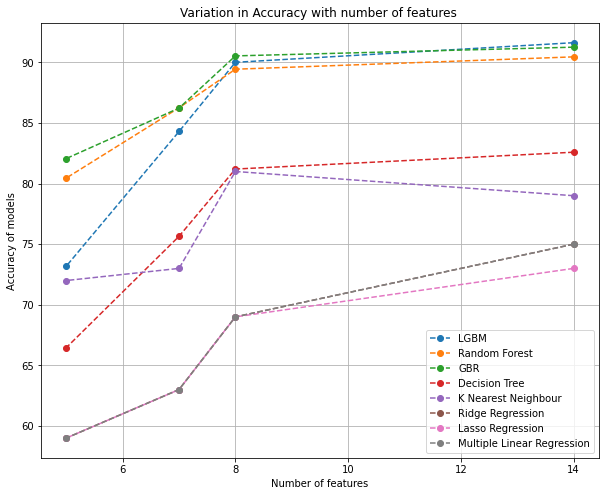

In [85]:

import numpy as np
import matplotlib.pyplot as plt
Feature = [14,8,7,5]
LGBM = [91.63,90.01,84.30,73.19]
RandomForest = [90.46,89.44,86.26,80.46]
GBR = [91.26,90.54,86.23,82.07]
DecisionTree = [82.59,81.20,75.65,66.46]
KNN = [79,81,73,72]
Ridge = [75,69,63,59]
Lasso = [73,69,63,59]
MultipleLinearReg = [75,69,63,59]

plt.figure(figsize = [10,8])
plt.plot(Feature,LGBM,'o--',label = 'LGBM')
plt.plot(Feature,RandomForest,'o--',label = 'Random Forest')
plt.plot(Feature,GBR,'o--',label = 'GBR')
plt.plot(Feature,DecisionTree,'o--',label = 'Decision Tree')
plt.plot(Feature,KNN,'o--',label = 'K Nearest Neighbour')
plt.plot(Feature,Ridge,'o--',label = 'Ridge Regression')
plt.plot(Feature,Lasso,'o--',label = 'Lasso Regression')
plt.plot(Feature,MultipleLinearReg,'o--',label = 'Multiple Linear Regression')
plt.xlabel("Number of features")
plt.ylabel('Accuracy of models')
plt.title('Variation in Accuracy with number of features ')
plt.legend()
plt.grid()
plt.show()

# TIME Vs No of Features

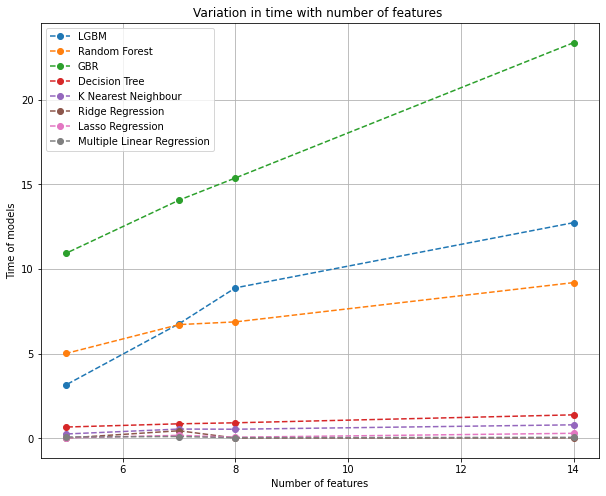

In [86]:
import numpy as np
import matplotlib.pyplot as plt
Feature = [14,8,7,5]
LGBM = [12.74,8.89,6.77,3.17]
RandomForest = [9.20,6.88,6.72,5.02]
GBR = [23.37,15.38,14.07,10.94]
DecisionTree = [1.39,0.92,0.86,0.67]
KNN = [0.80,0.54,0.55,0.26]
Ridge = [0.03,0.02,0.45,0.02]
Lasso = [0.30,0.07,0.18,0.03]
MultipleLinearReg = [0.06,0.04,0.11,0.08]

plt.figure(figsize = [10,8])
plt.plot(Feature,LGBM,'o--',label = 'LGBM')
plt.plot(Feature,RandomForest,'o--',label = 'Random Forest')
plt.plot(Feature,GBR,'o--',label = 'GBR')
plt.plot(Feature,DecisionTree,'o--',label = 'Decision Tree')
plt.plot(Feature,KNN,'o--',label = 'K Nearest Neighbour')
plt.plot(Feature,Ridge,'o--',label = 'Ridge Regression')
plt.plot(Feature,Lasso,'o--',label = 'Lasso Regression')
plt.plot(Feature,MultipleLinearReg,'o--',label = 'Multiple Linear Regression')
plt.xlabel("Number of features")
plt.ylabel('Time of models')
plt.title('Variation in time with number of features ')
plt.legend()
plt.grid()
plt.show()